# Goals:
## -compare change of houing prices with change in imigrants
## -find out wether imigrants tend to buy newly built properties or existing properties


### Importing libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown
import geopandas as gpd
import plotly.express as px
import numpy as np
import seaborn as sns
from shapely.ops import transform
import pyproj
import plotly.graph_objects as go
import geojson

### Setting up the table



In [2]:
table = pd.read_csv("../Data/housing_prices.csv")
table = table.drop(columns=["DATAFLOW", "LAST UPDATE", "freq"])
table['Year'] = table['TIME_PERIOD'].str.split('-Q').str[0].astype(int)
table = table[(table['Year'] >= 2005) & (table['Year'] <= 2024)]
yearly_avg = table.groupby(['geo', 'Year'])['OBS_VALUE'].mean().reset_index()
states=table["geo"].unique()
states=[i for i in states if len(i)<35] #ensuring we have proper country names
print(states)


['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Germany', 'Denmark', 'Estonia', 'Spain', 'Finland', 'France', 'Croatia', 'Hungary', 'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia', 'Türkiye', 'United Kingdom', 'Iceland', 'Switzerland']


### Ploting graphs for each country


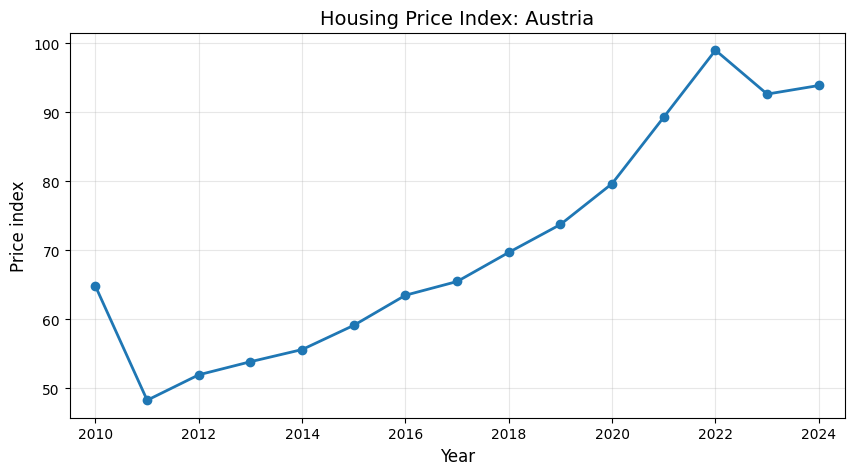

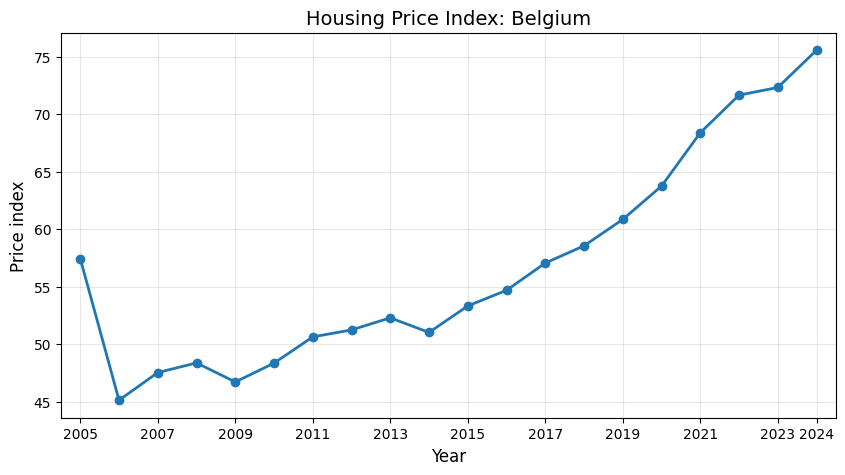

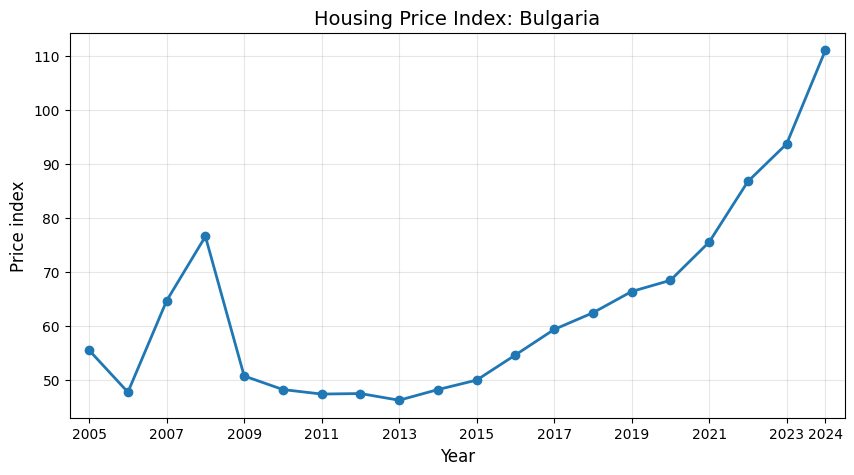

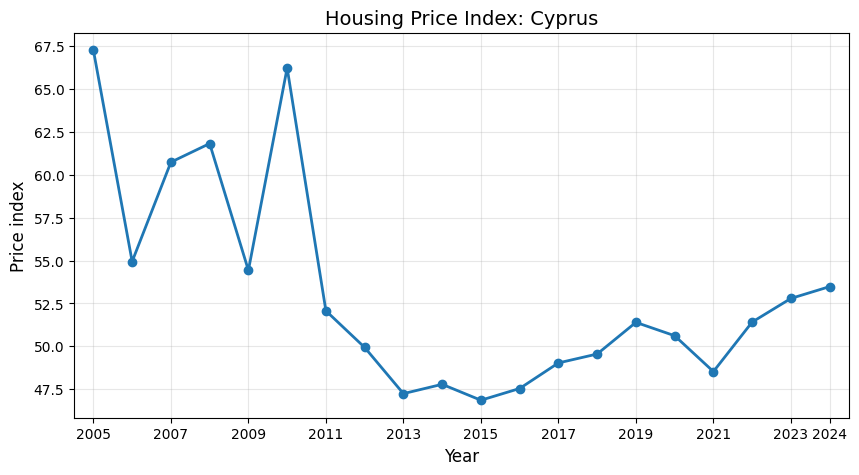

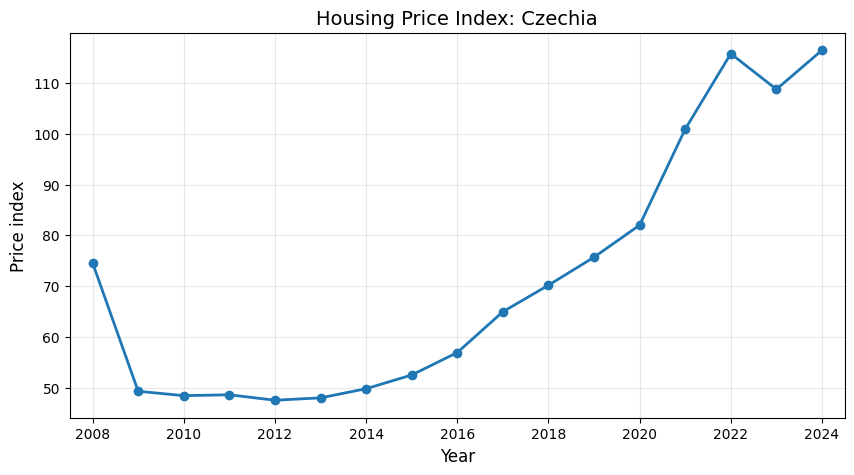

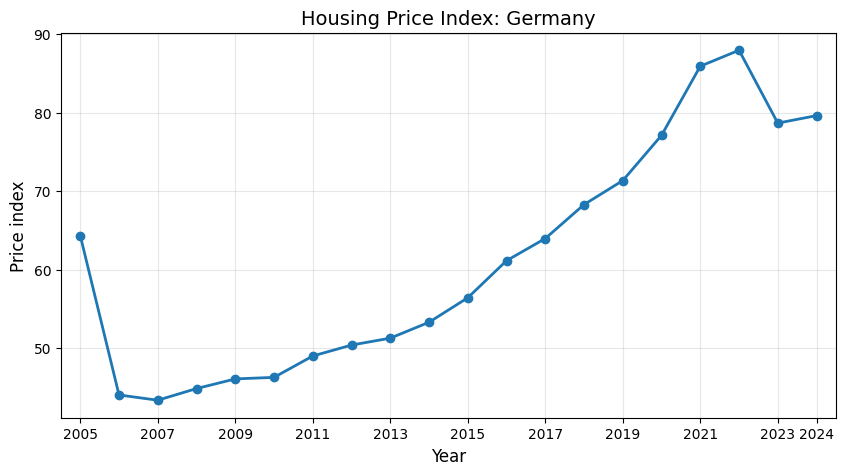

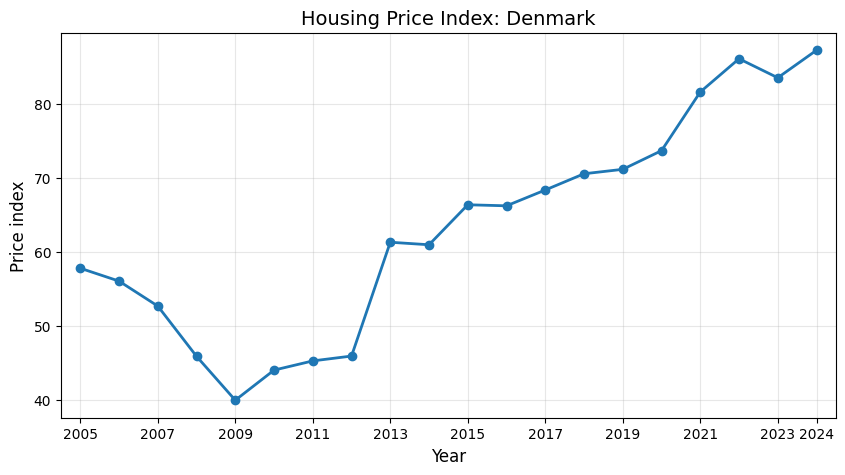

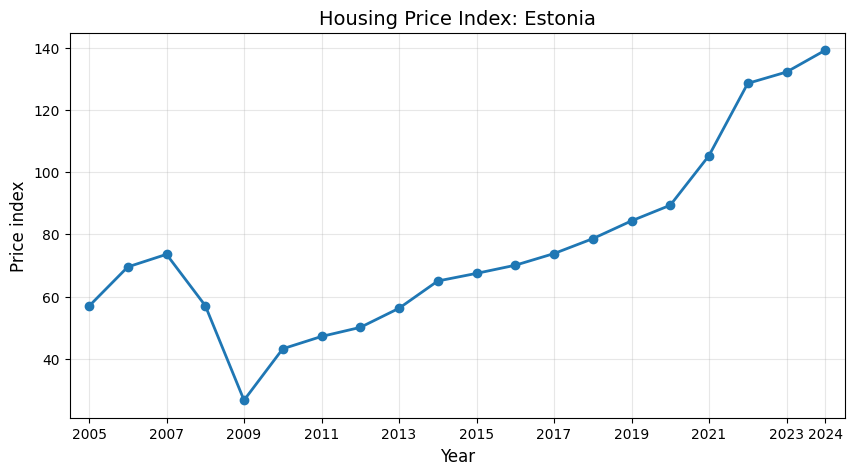

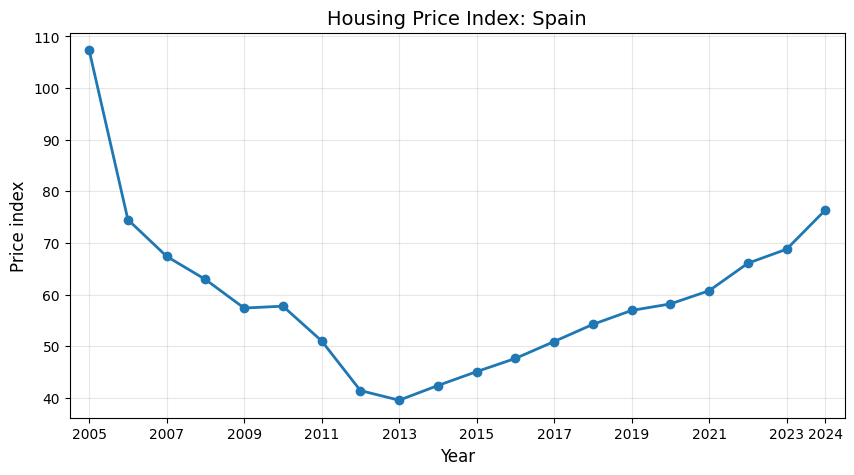

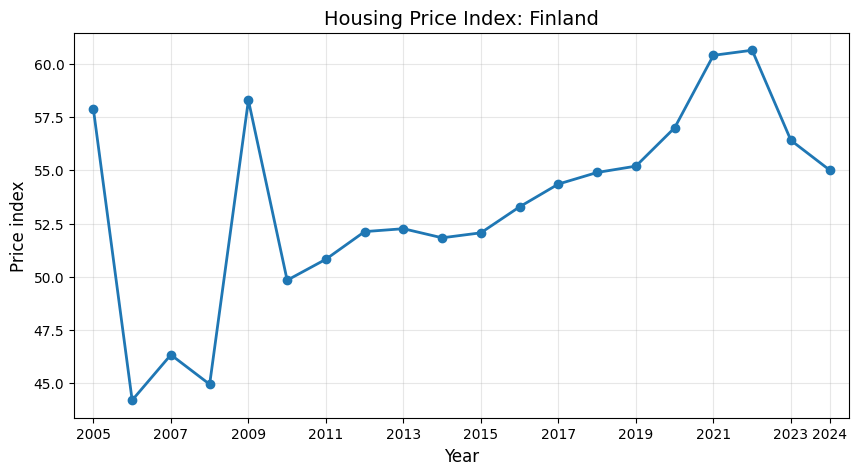

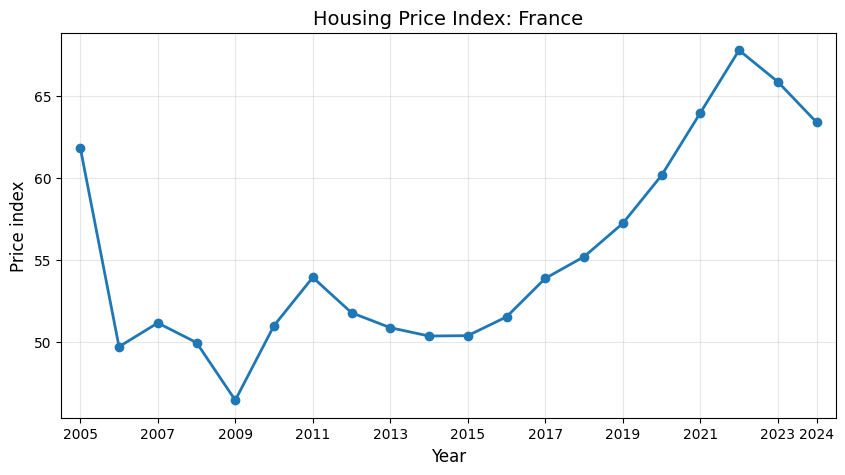

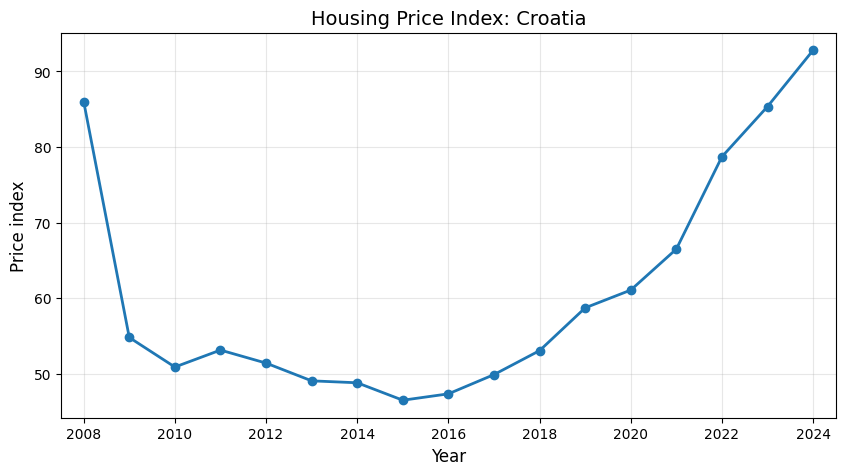

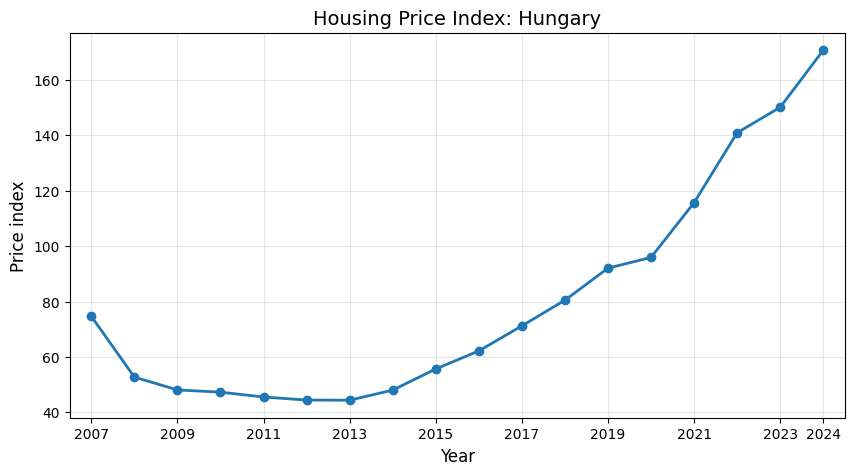

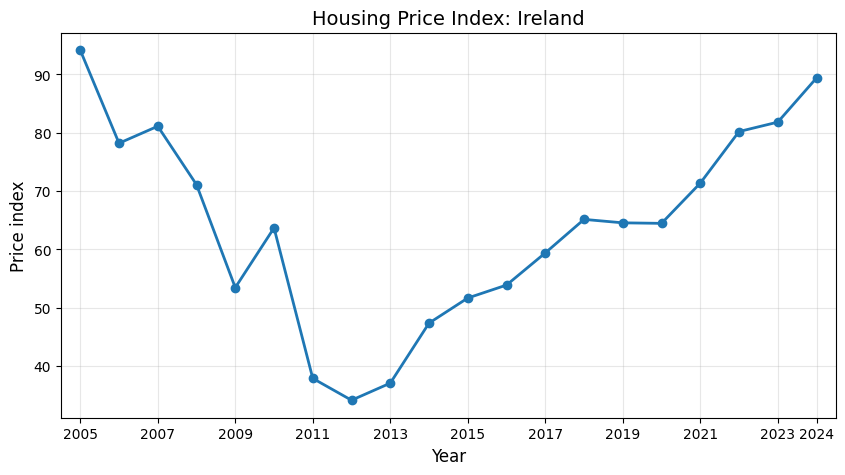

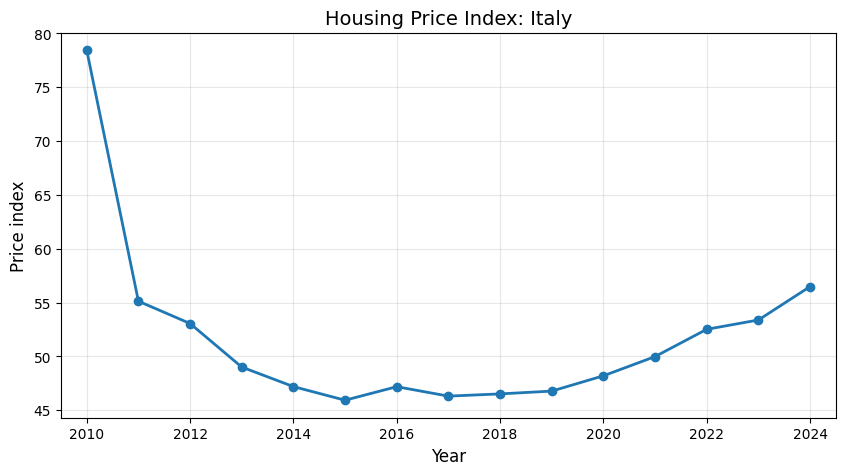

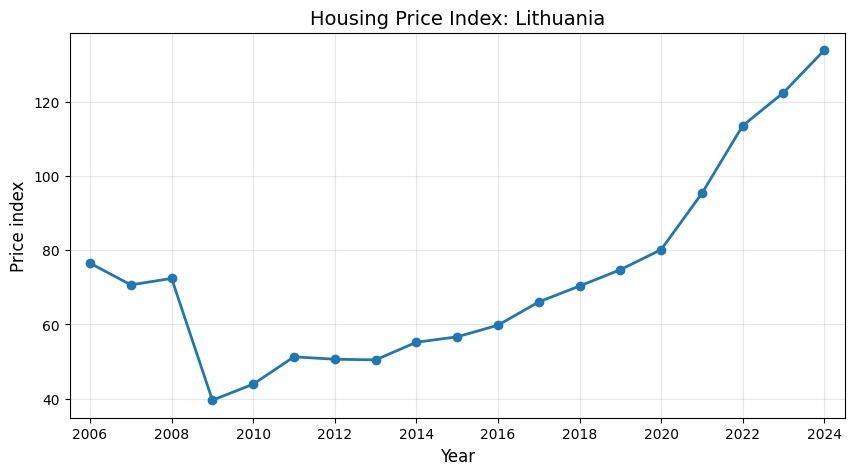

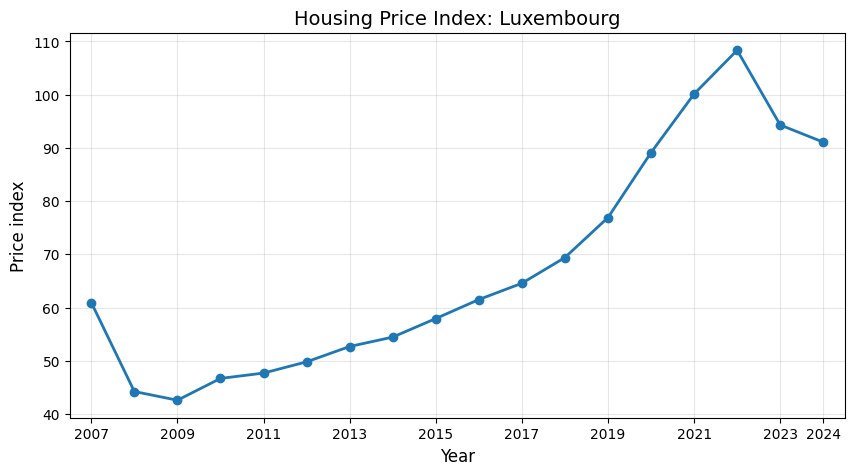

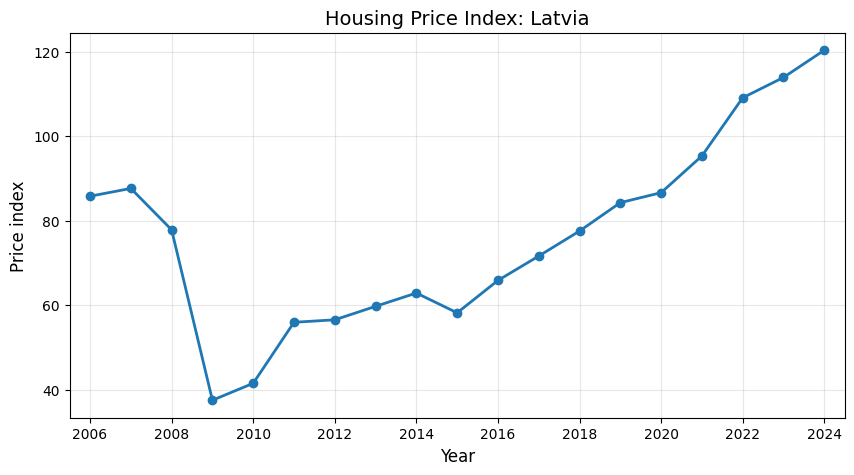

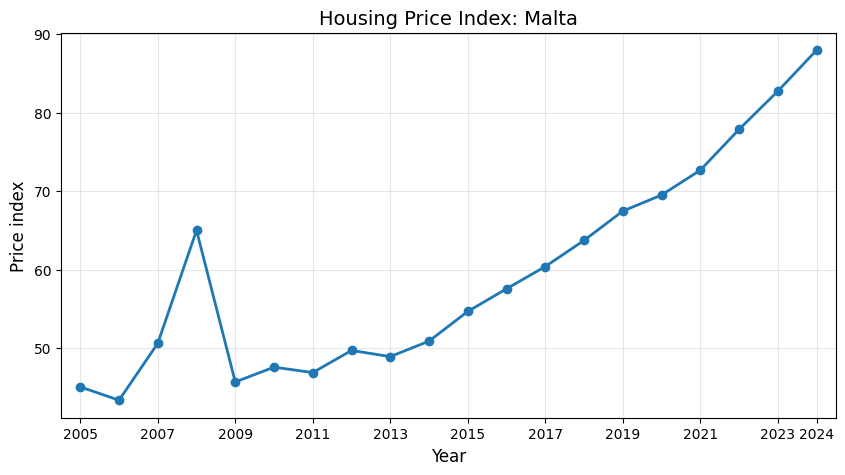

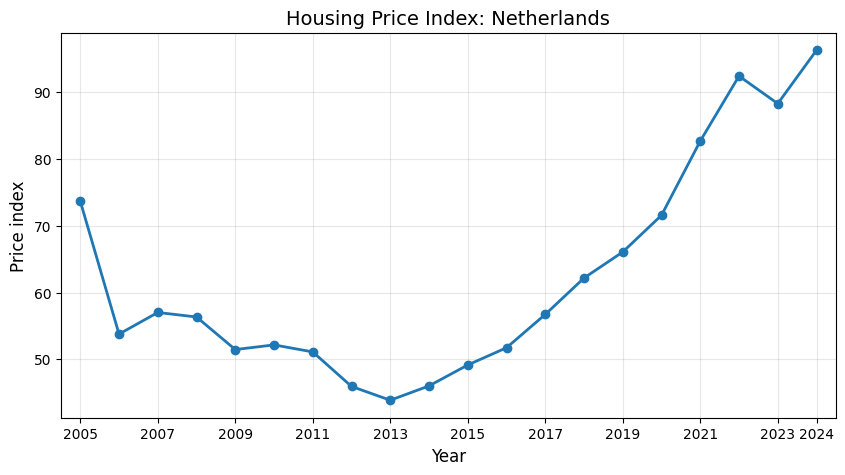

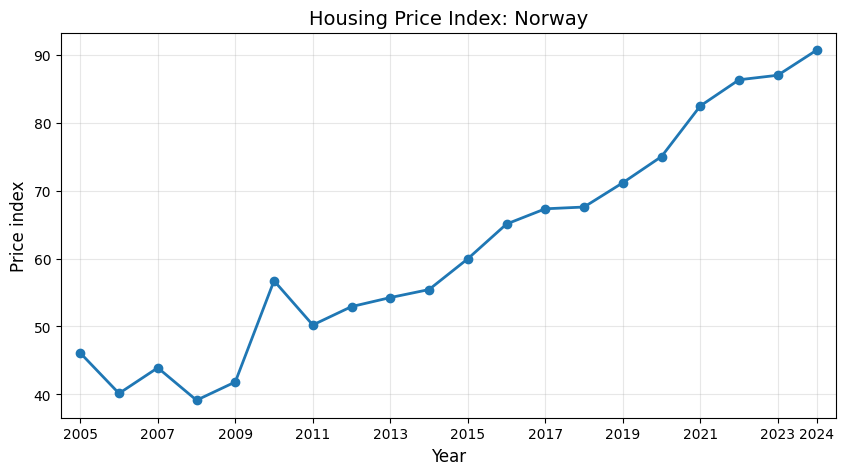

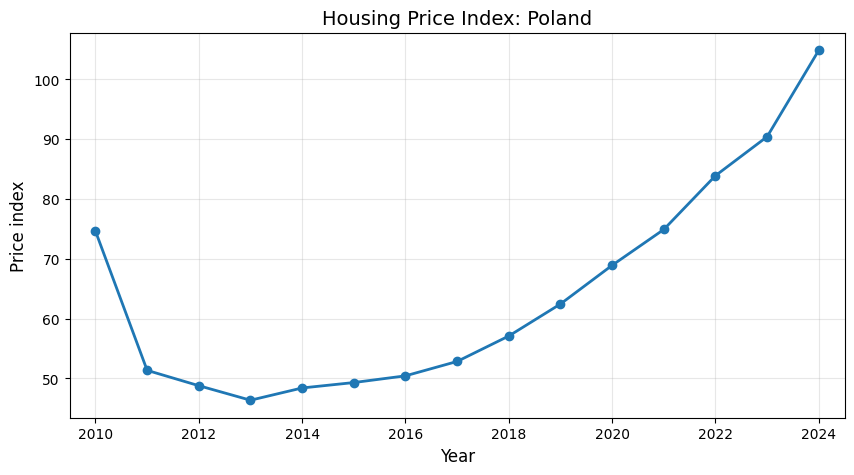

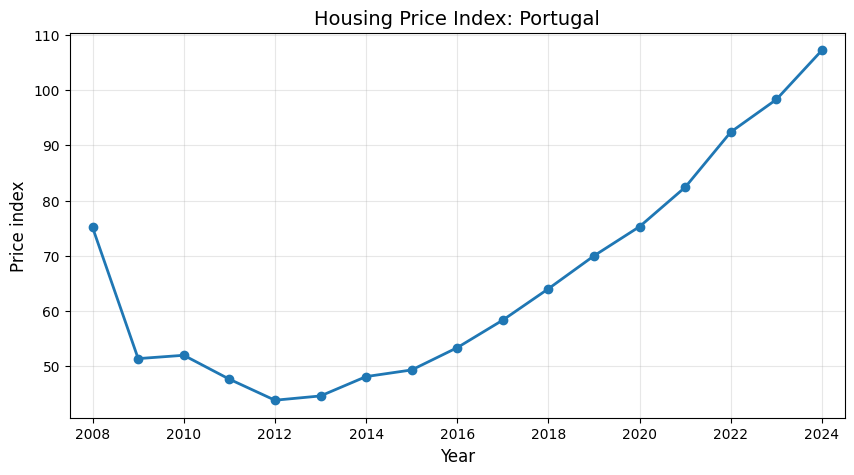

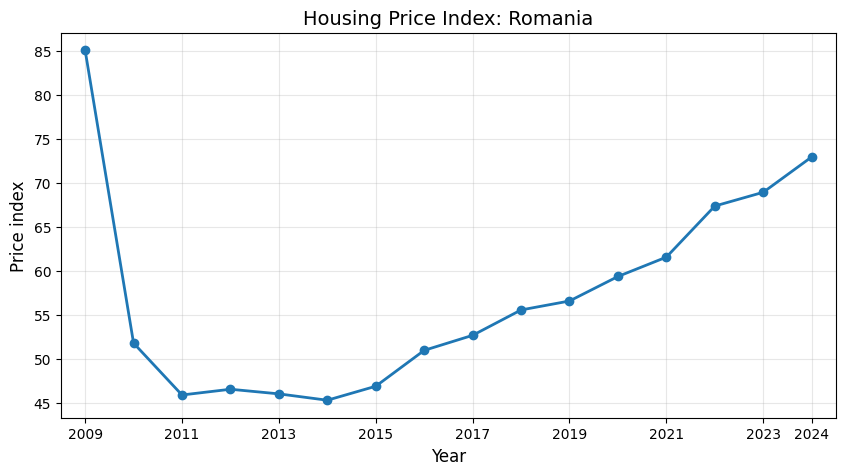

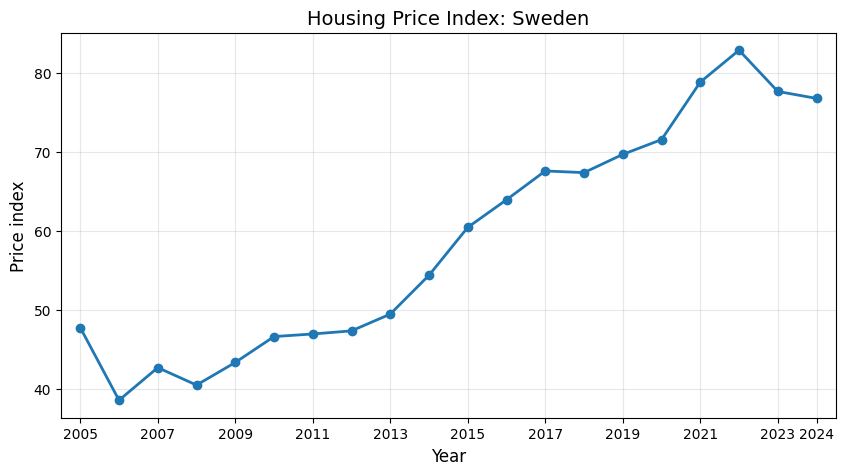

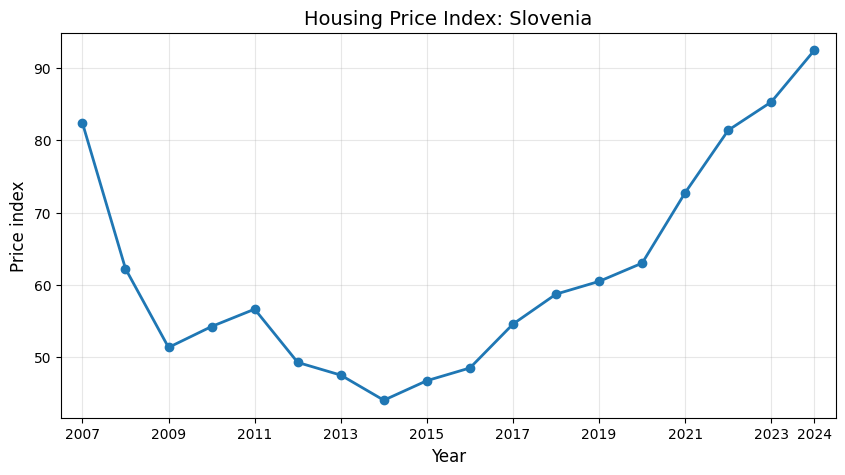

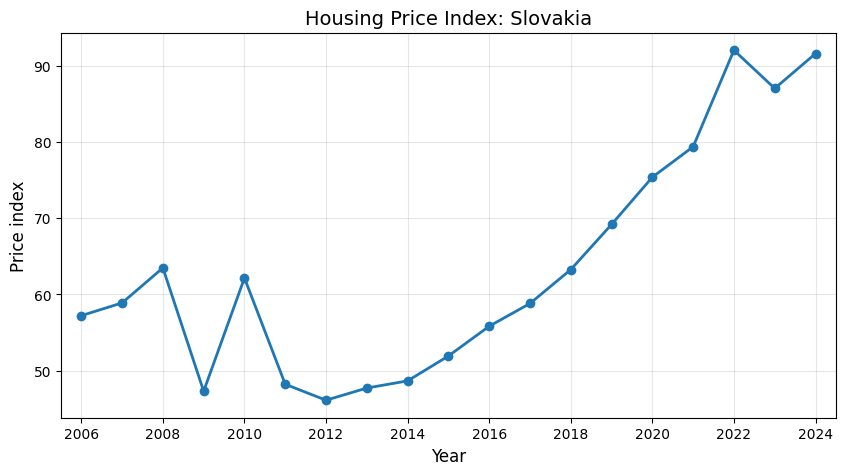

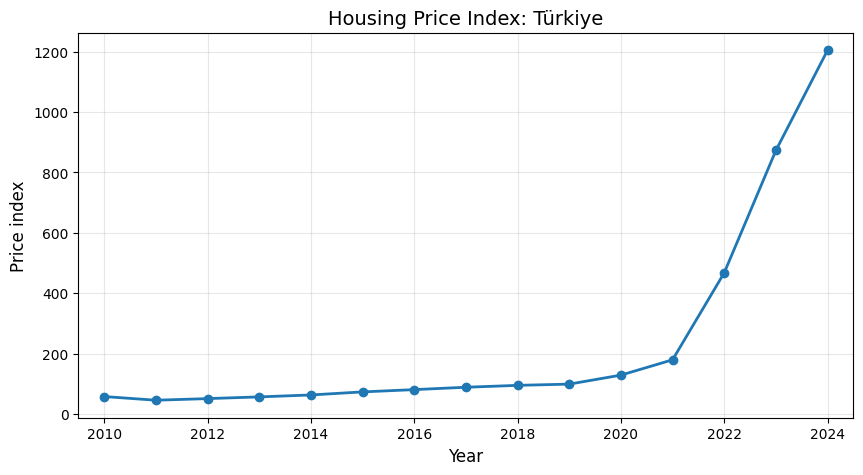

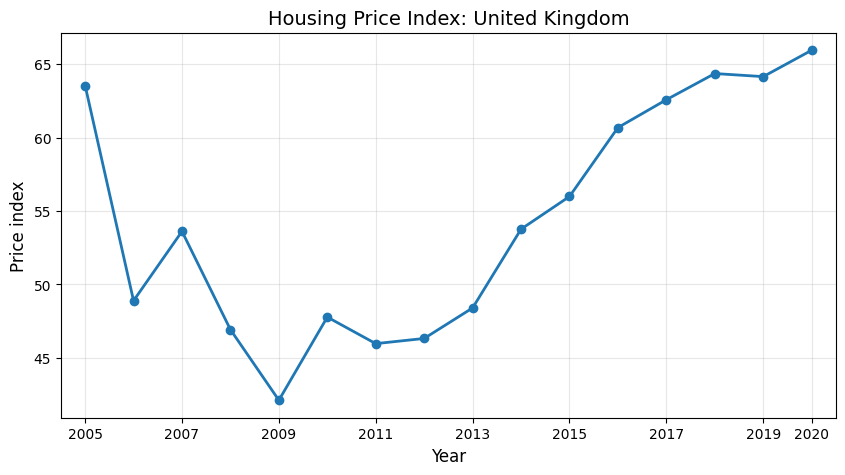

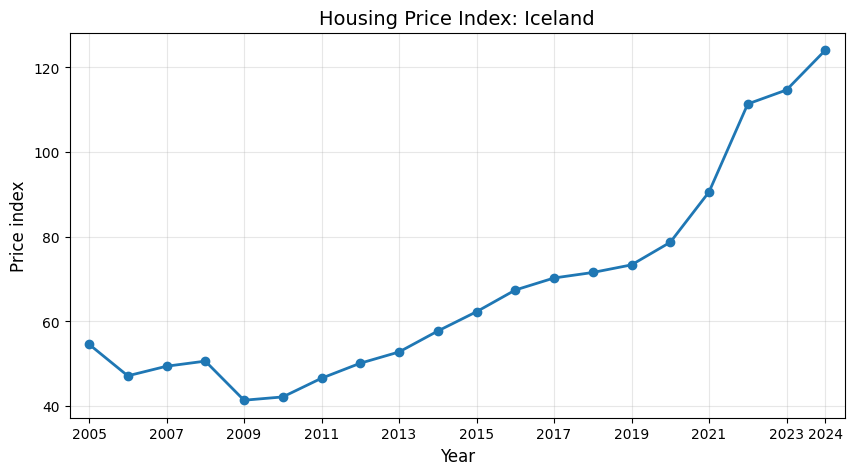

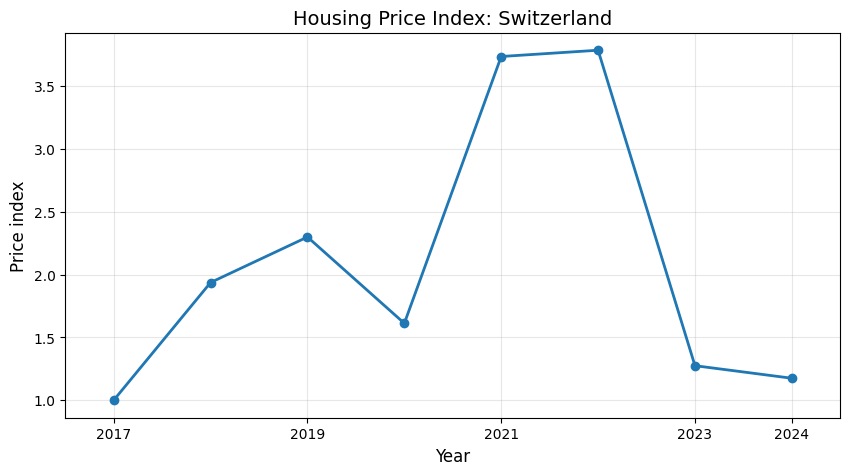

In [38]:
for country in states:
    country_data = yearly_avg[yearly_avg['geo'] == country]
    
    if country_data.empty:
        continue  
    
    min_year = min(country_data['Year'].to_list())
    max_year = max(country_data['Year'].to_list())
    year_range = max_year - min_year
    
    plt.figure(figsize=(10, 5))
    plt.plot(country_data['Year'], 
             country_data['OBS_VALUE'], 
             marker='o', 
             linestyle='-', 
             linewidth=2)  
    
    plt.xlim(min_year - 0.5, max_year + 0.5)
    
    if year_range <= 5: 
        step = 1
    else:  
        step = 2
    
    xticks = list(range(min_year, max_year + 1, step))
    if xticks[-1] != max_year:  
        xticks.append(max_year)
    
    plt.xticks(xticks)
    plt.title(f'Housing Price Index: {country}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Price index', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.show()

#### Importing table for immigration and creating foreign born population graphs


C:\Users\adami\AppData\Local\Temp\ipykernel_22272\1939552420.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  immigration_count=pd.read_csv("../Data/immigration/immigration_citizenship.csv")


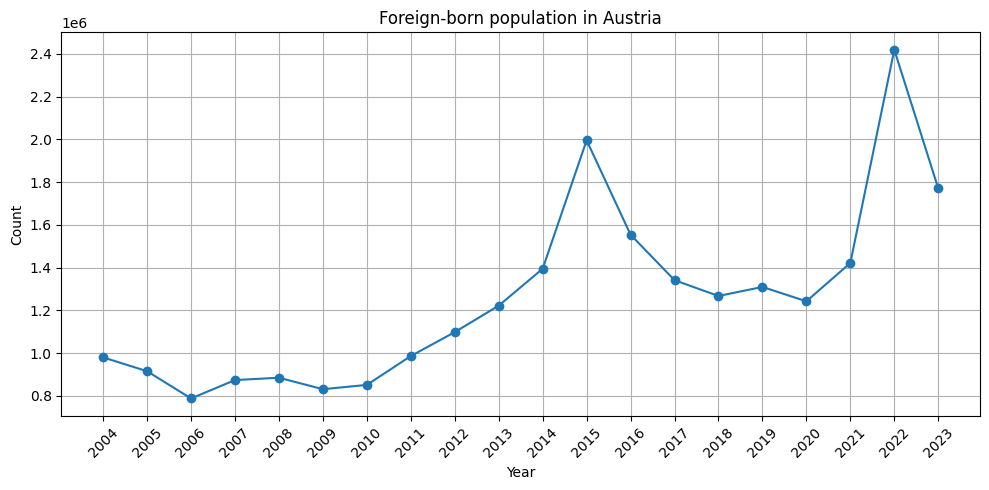

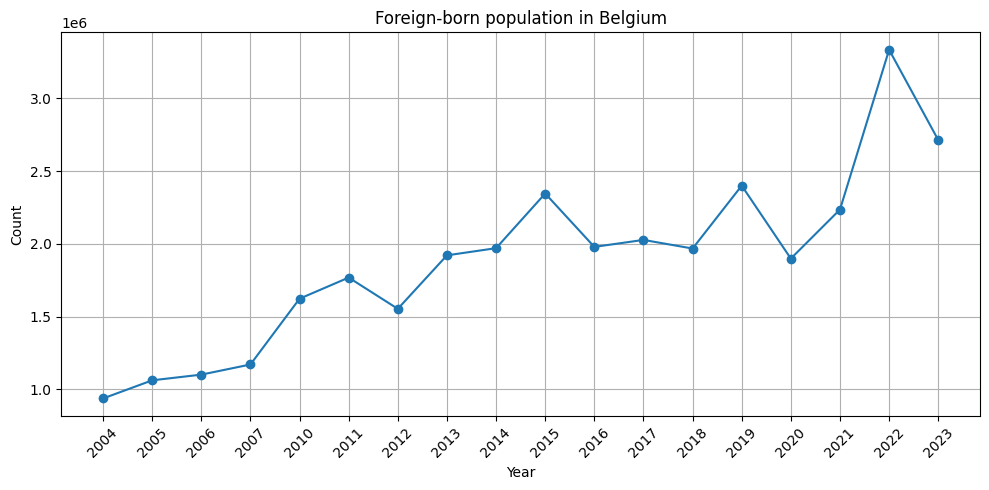

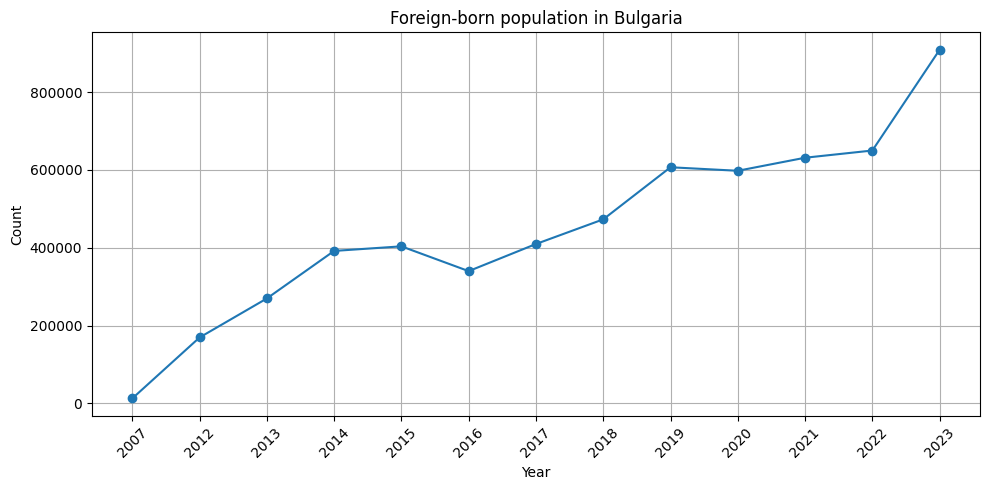

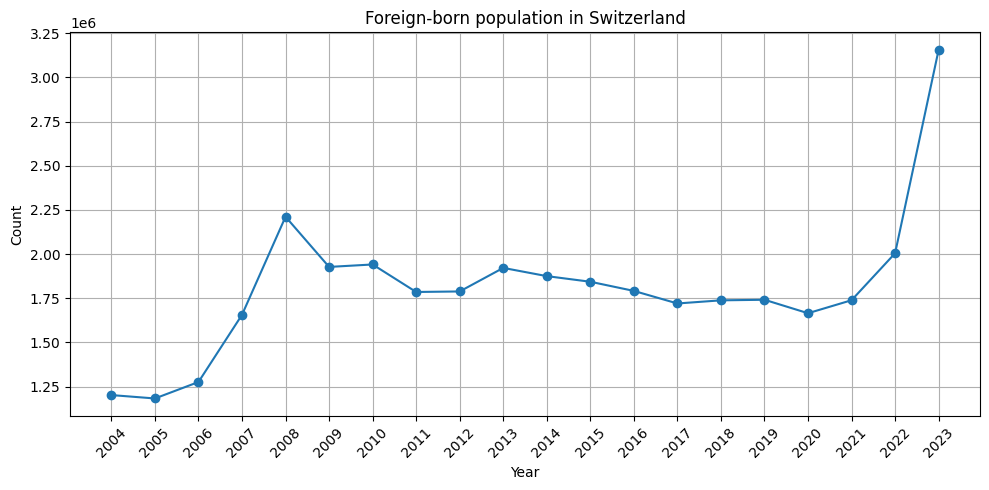

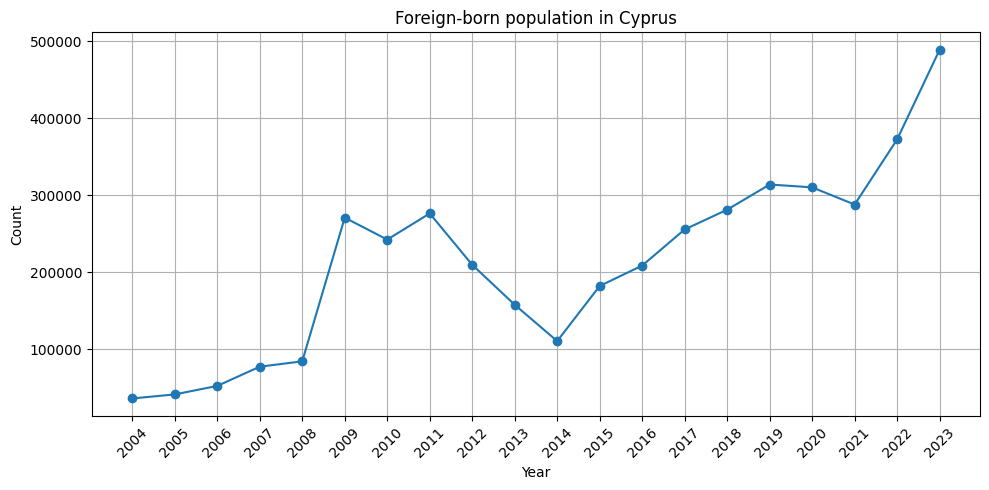

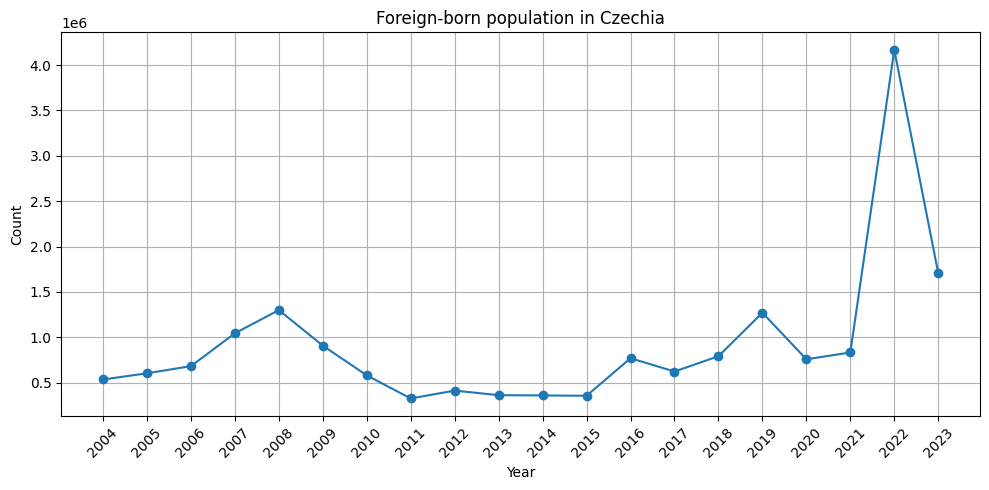

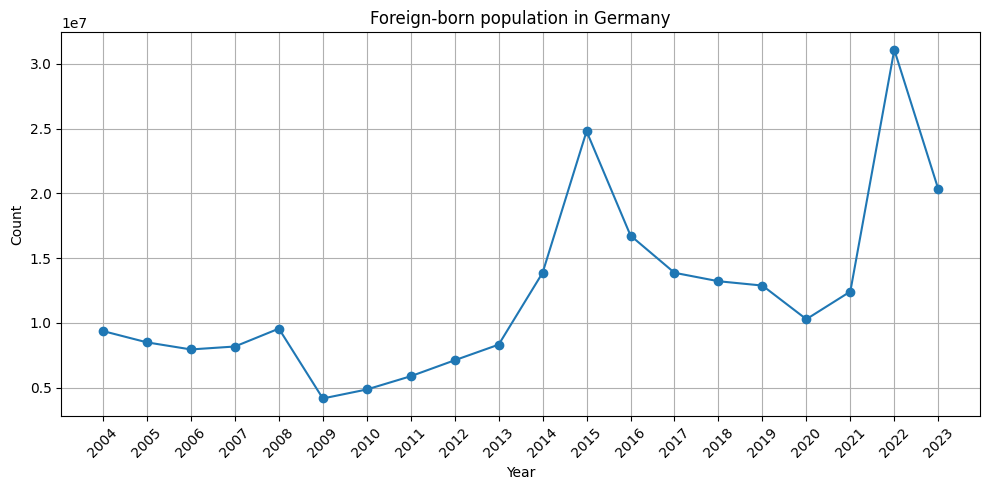

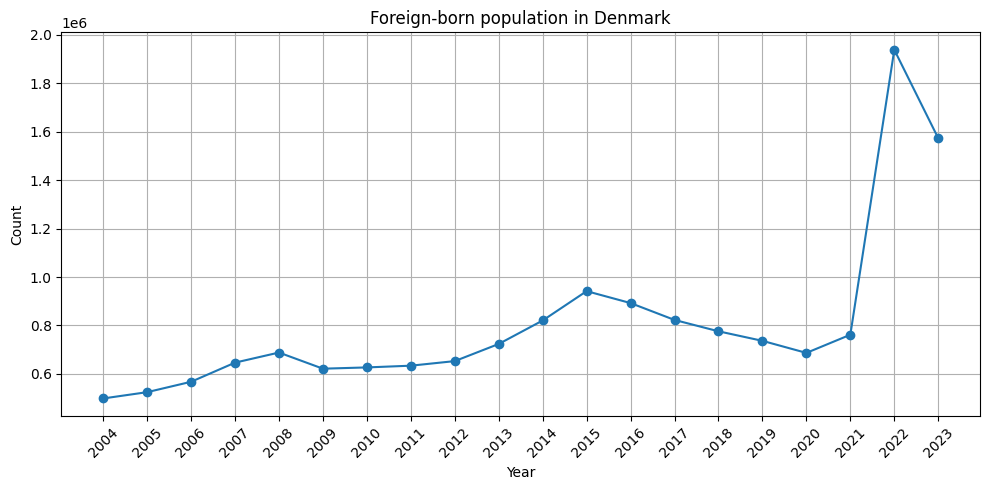

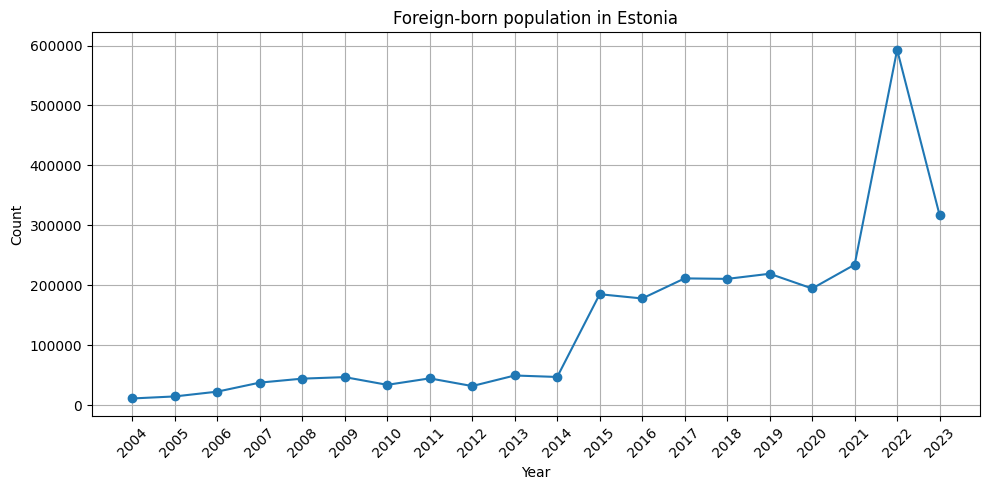

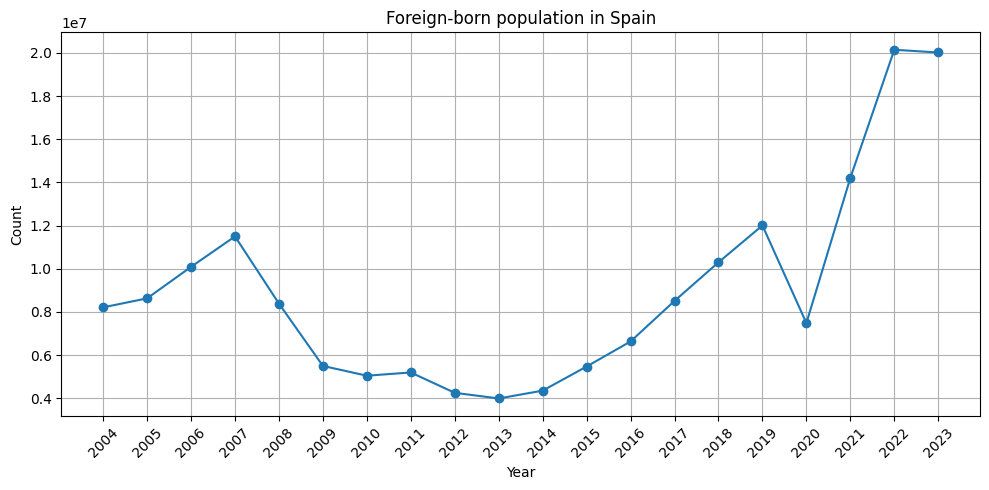

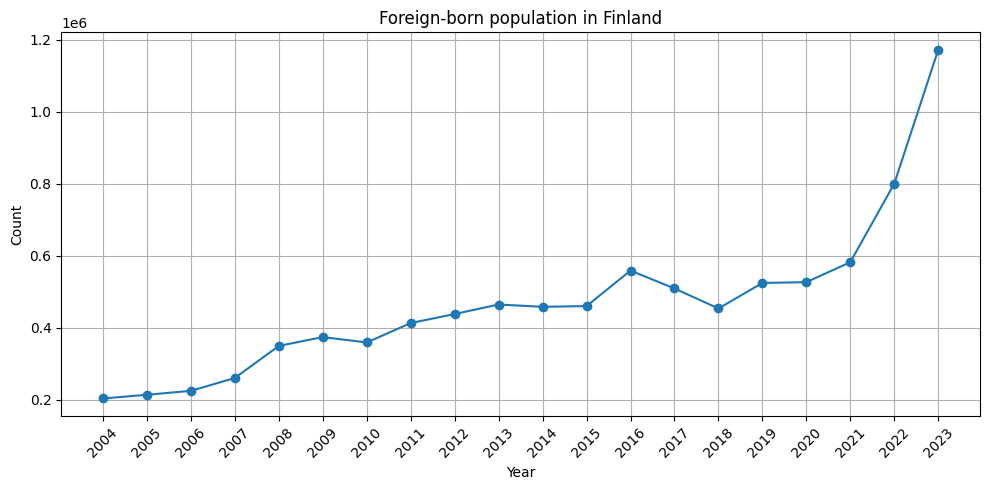

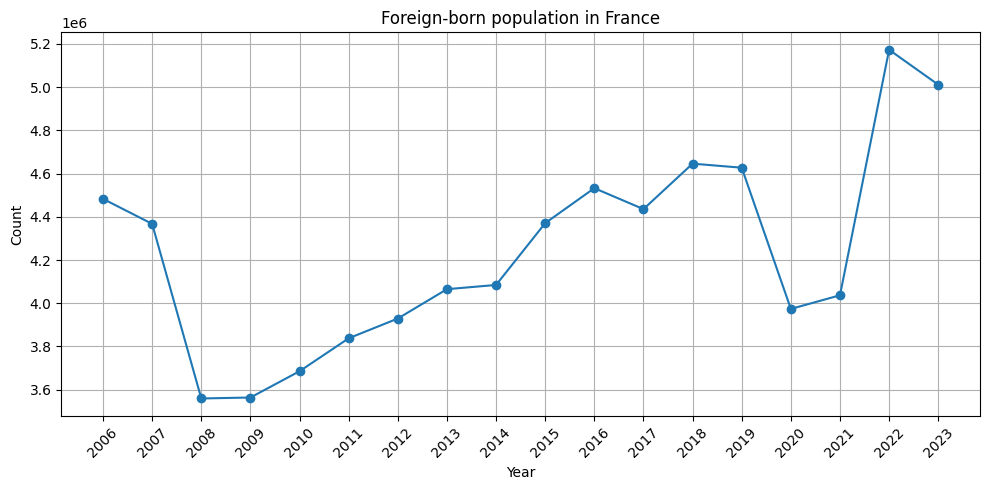

C:\Users\adami\AppData\Local\Temp\ipykernel_22272\1939552420.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(r'[^\d.]', '', regex=True)


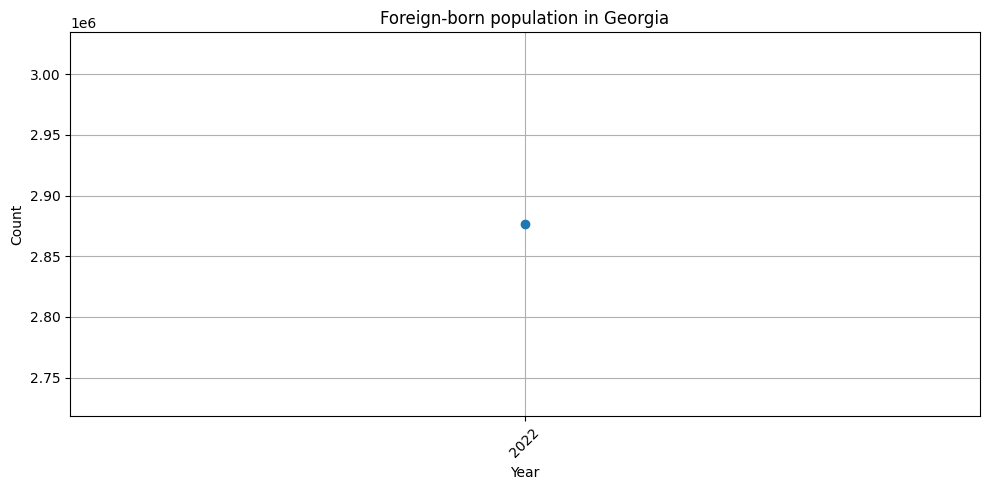

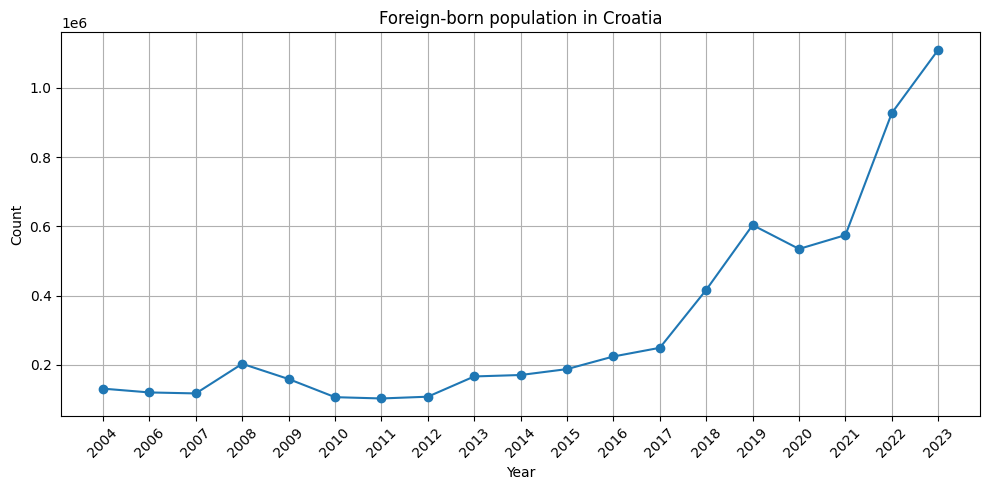

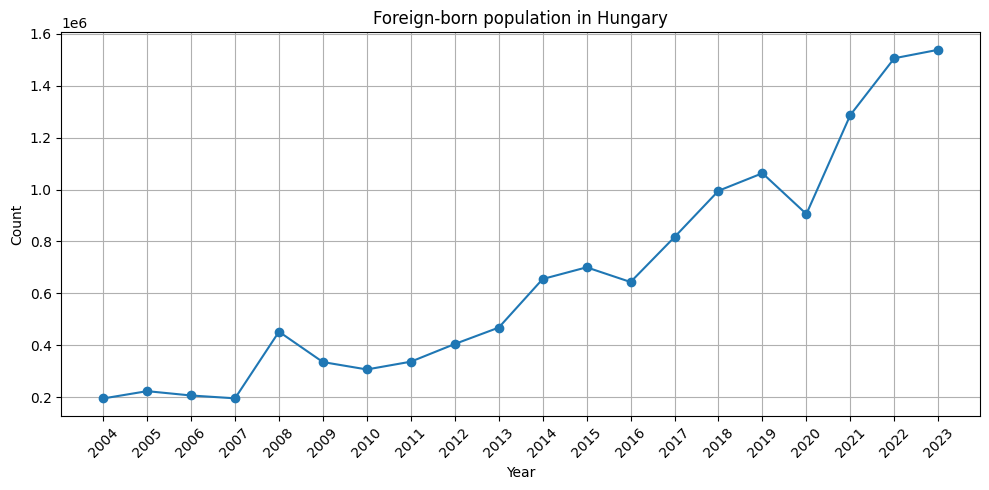

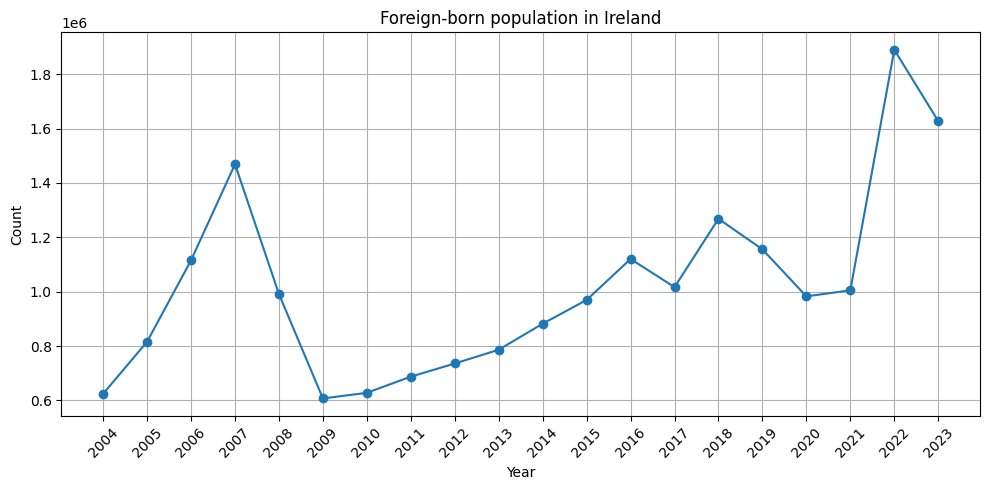

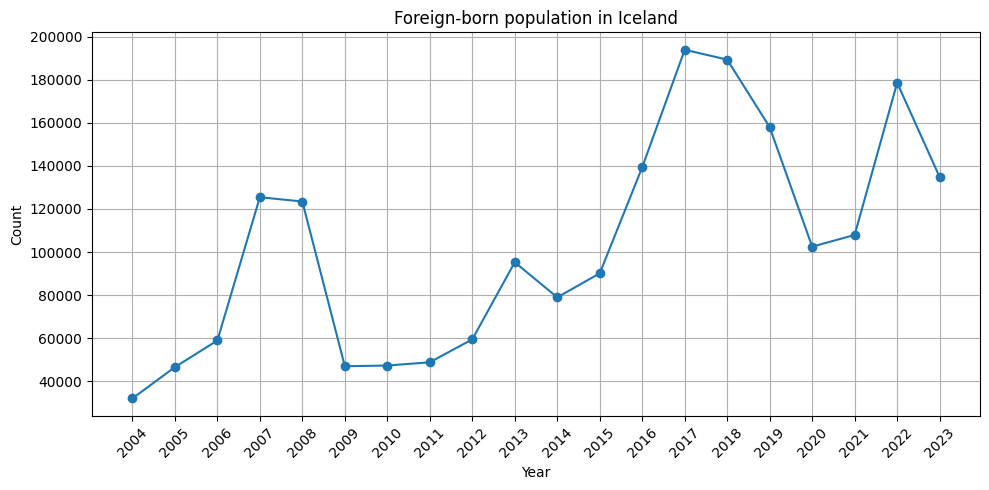

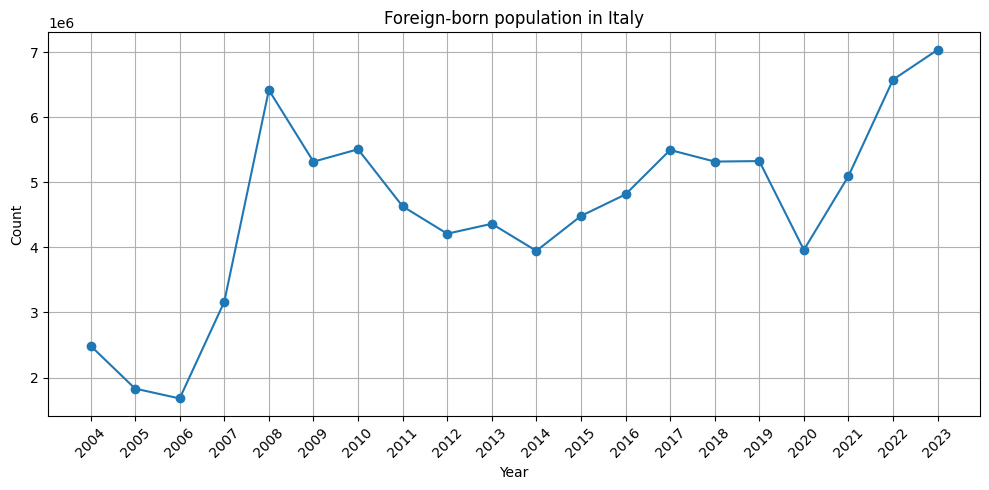

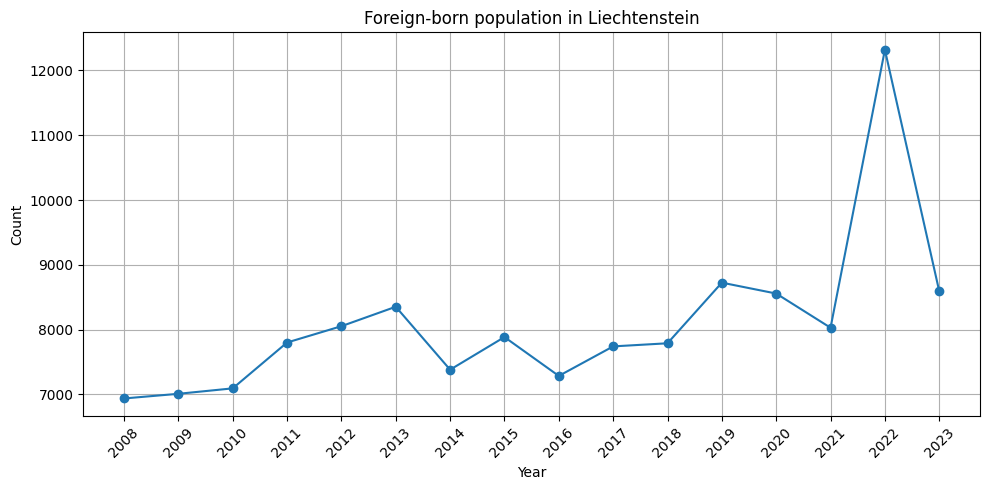

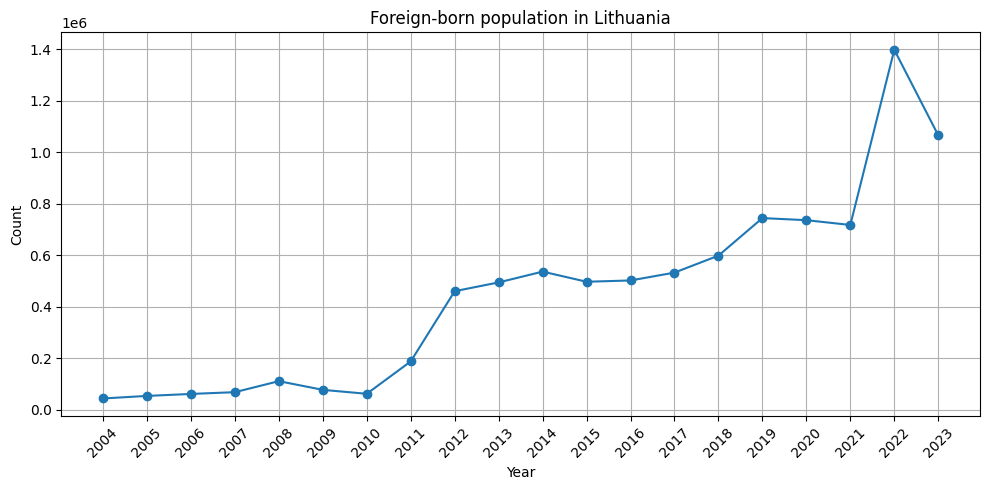

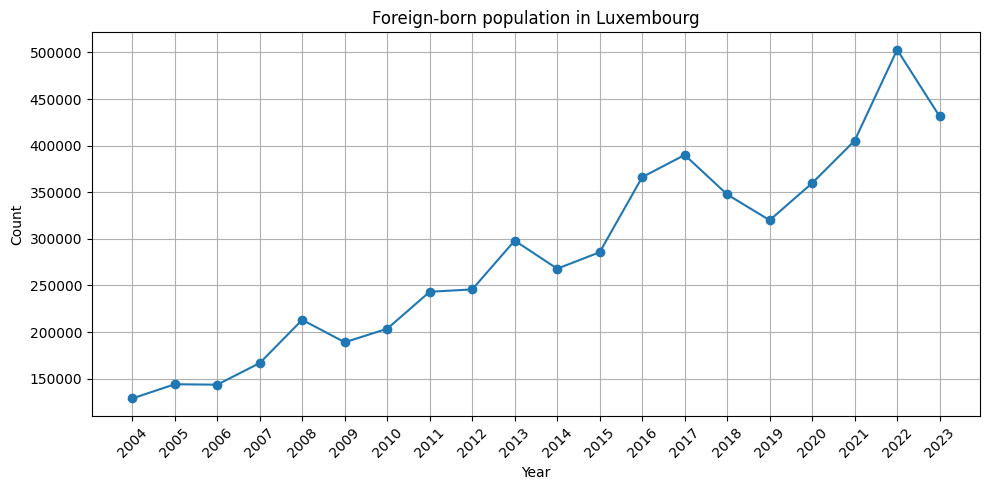

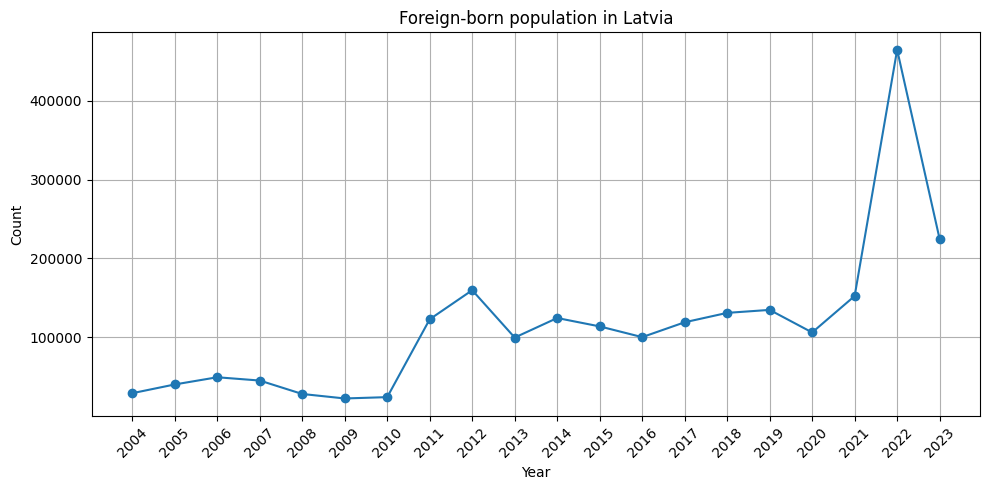

C:\Users\adami\AppData\Local\Temp\ipykernel_22272\1939552420.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(r'[^\d.]', '', regex=True)


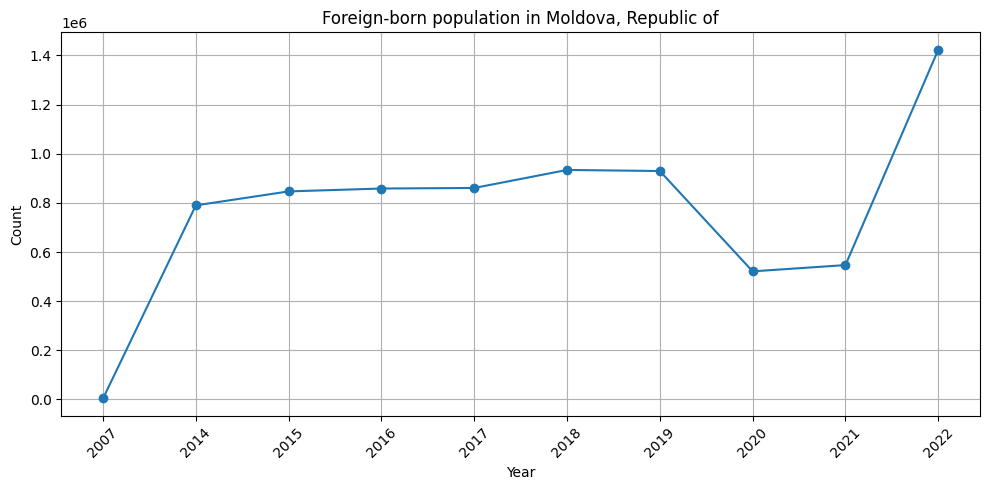

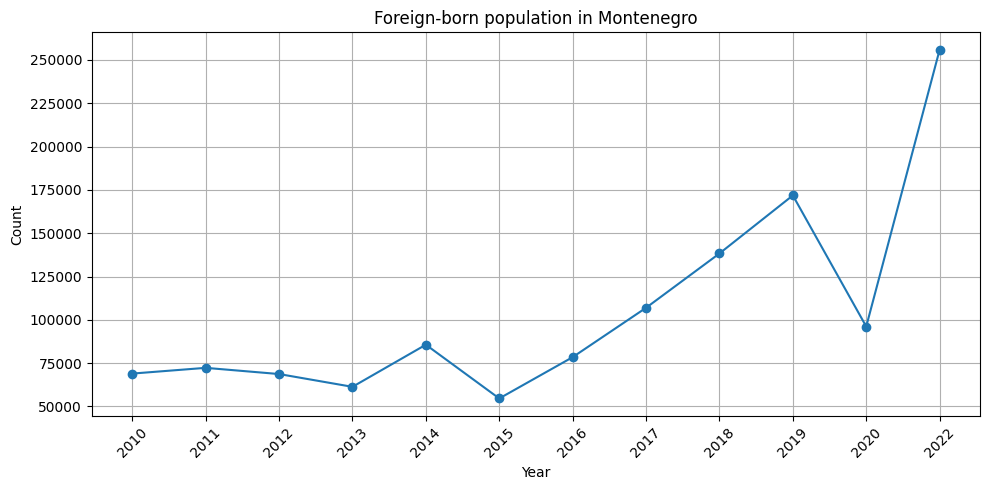

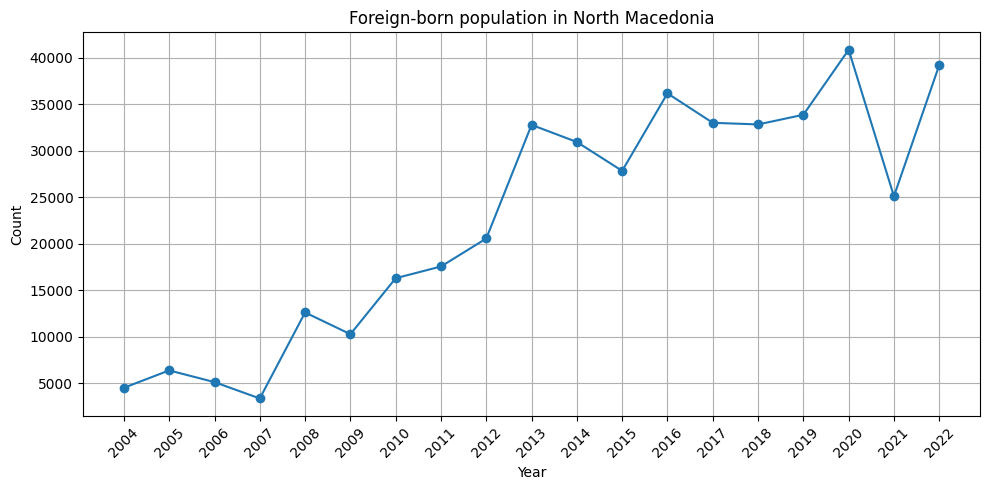

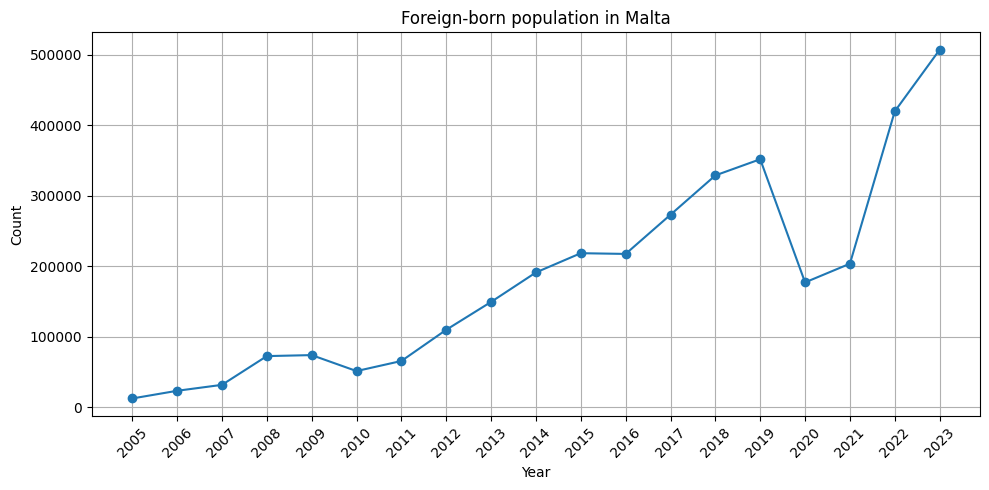

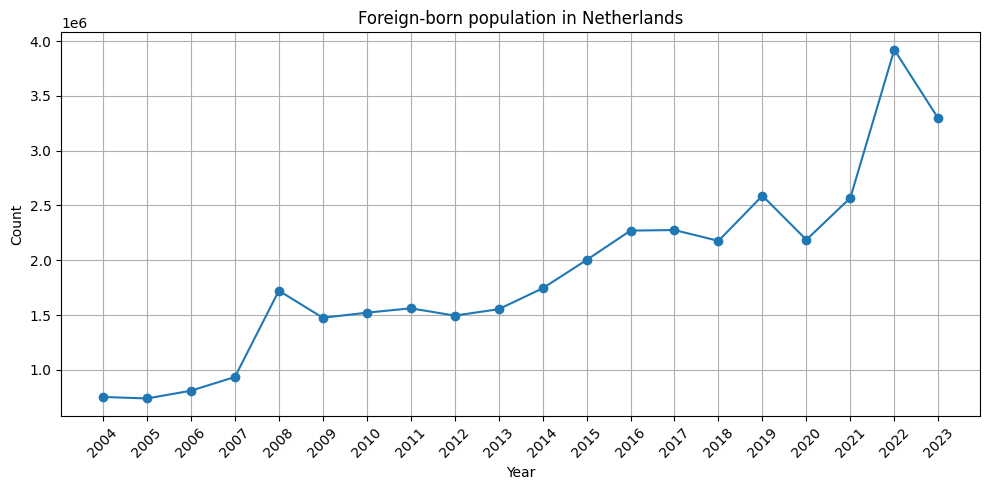

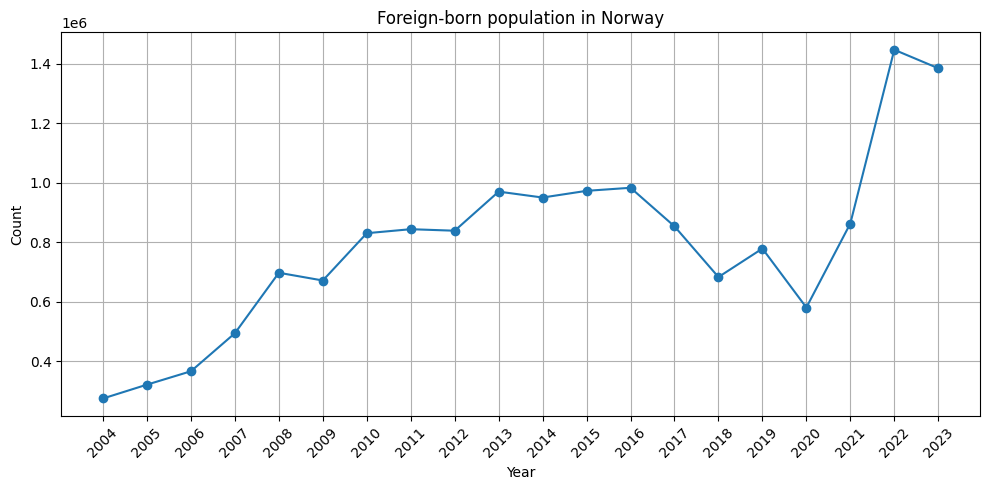

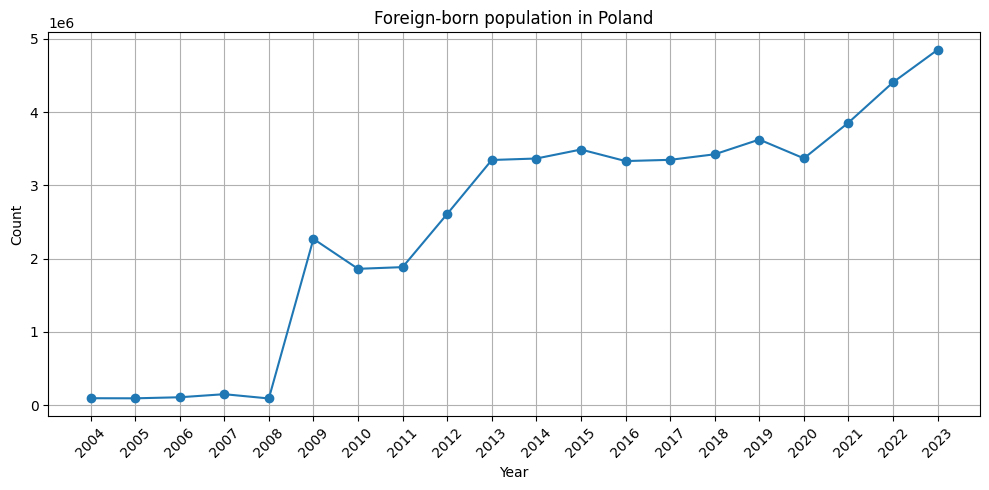

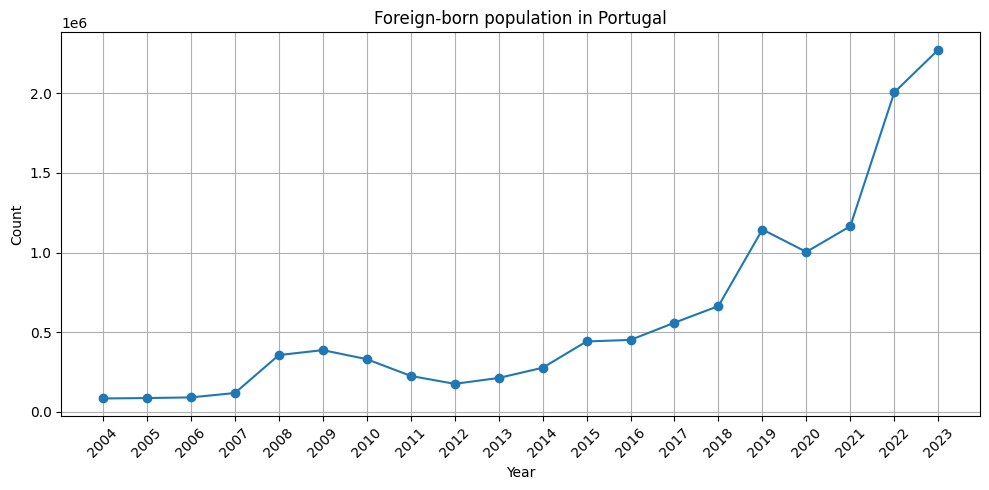

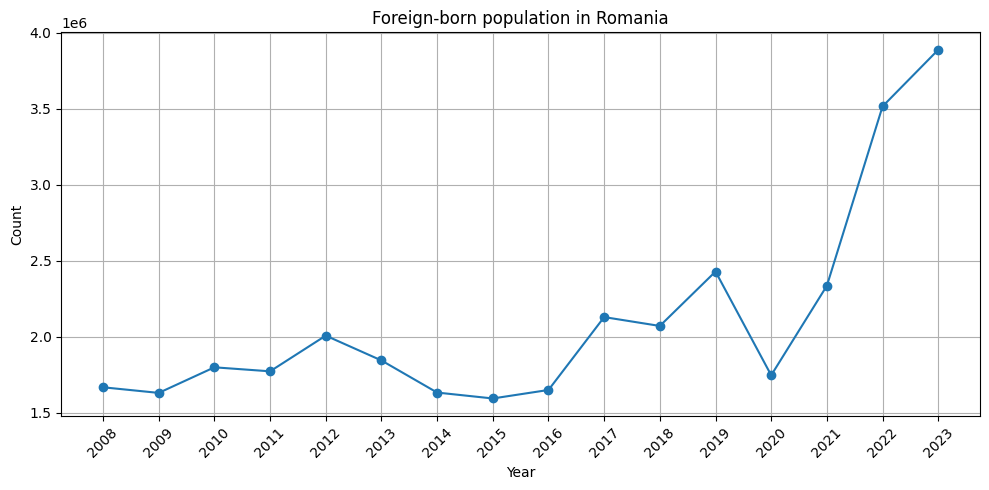

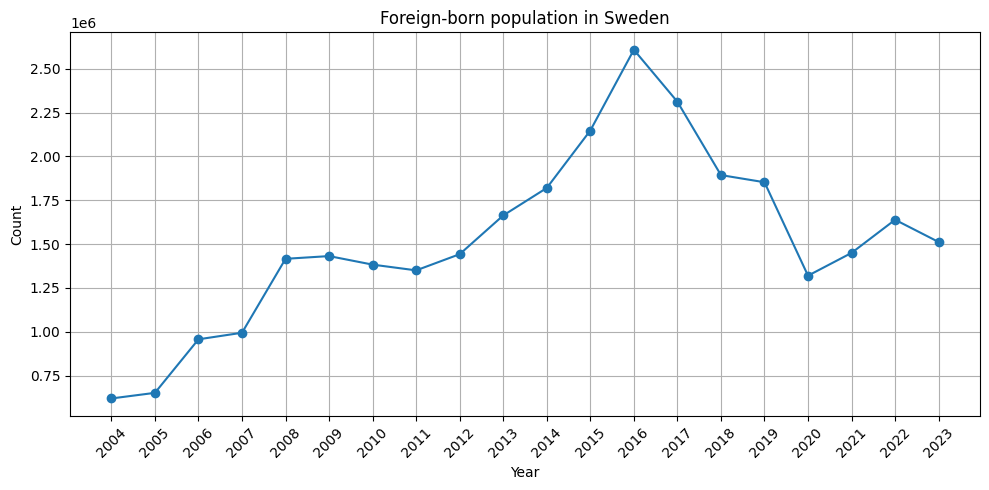

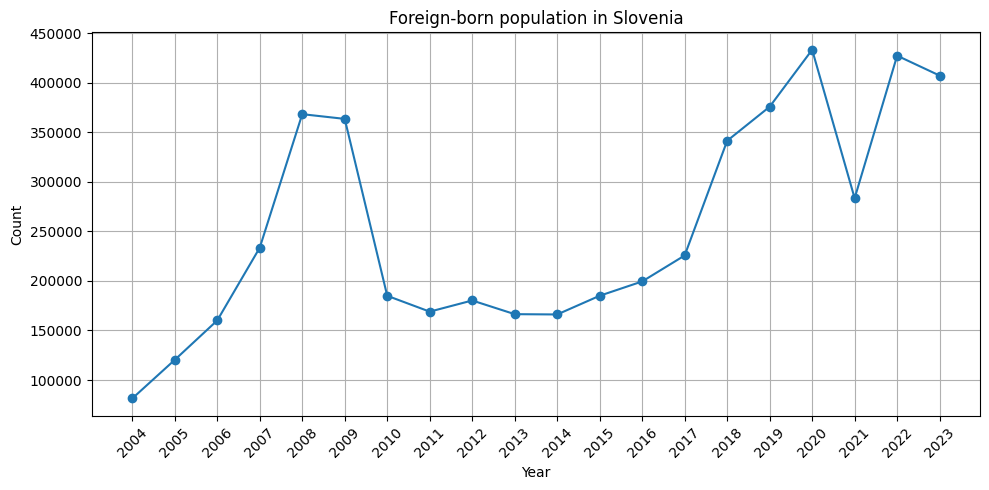

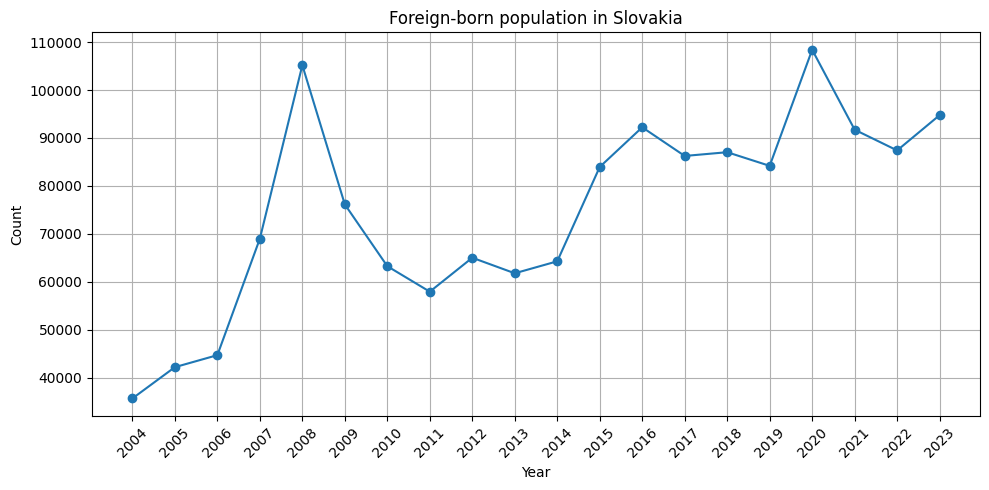

C:\Users\adami\AppData\Local\Temp\ipykernel_22272\1939552420.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(r'[^\d.]', '', regex=True)


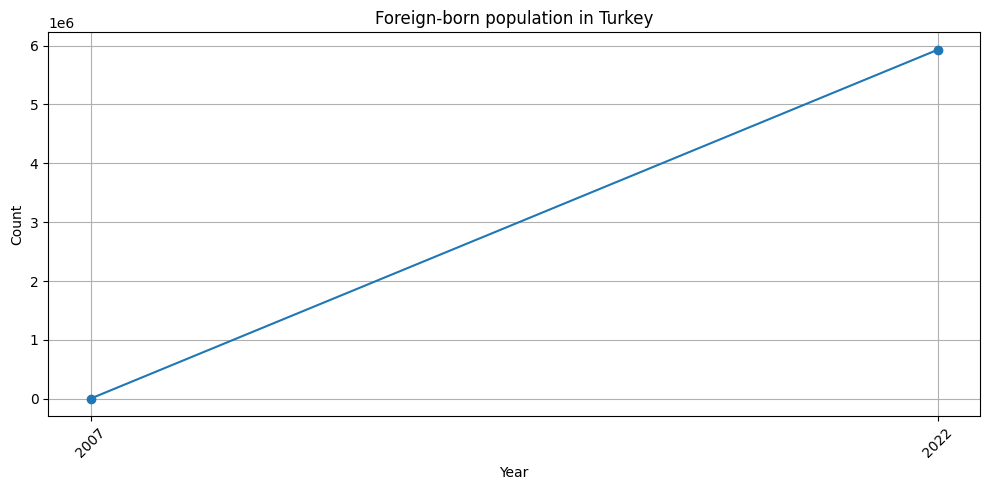

C:\Users\adami\AppData\Local\Temp\ipykernel_22272\1939552420.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(r'[^\d.]', '', regex=True)


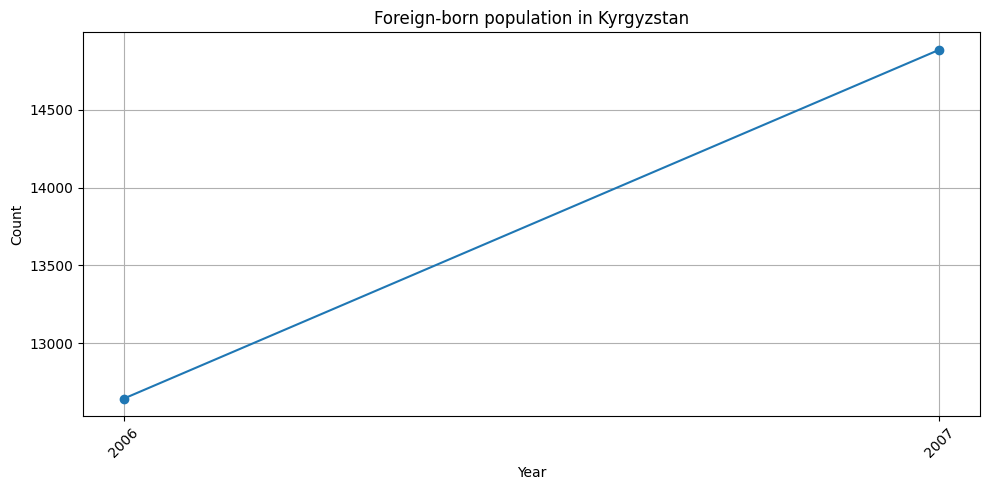

C:\Users\adami\AppData\Local\Temp\ipykernel_22272\1939552420.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(r'[^\d.]', '', regex=True)


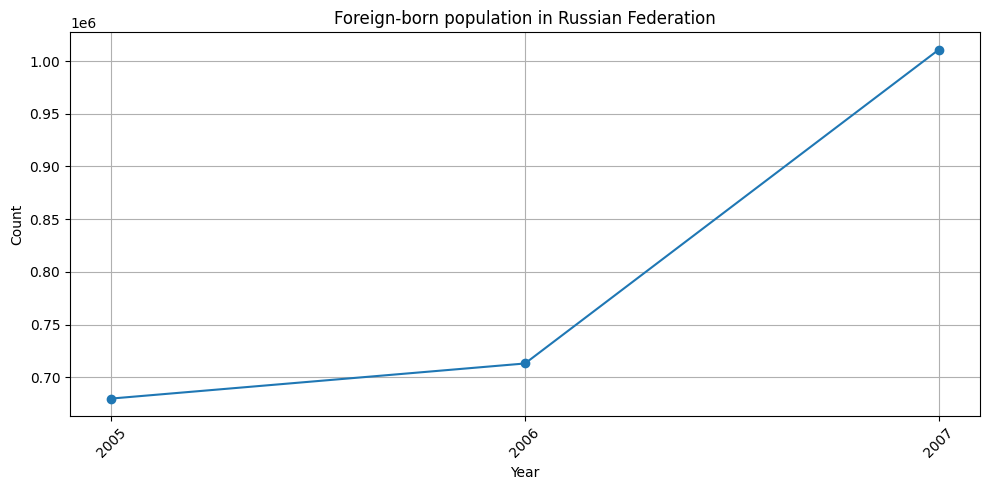

C:\Users\adami\AppData\Local\Temp\ipykernel_22272\1939552420.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(r'[^\d.]', '', regex=True)


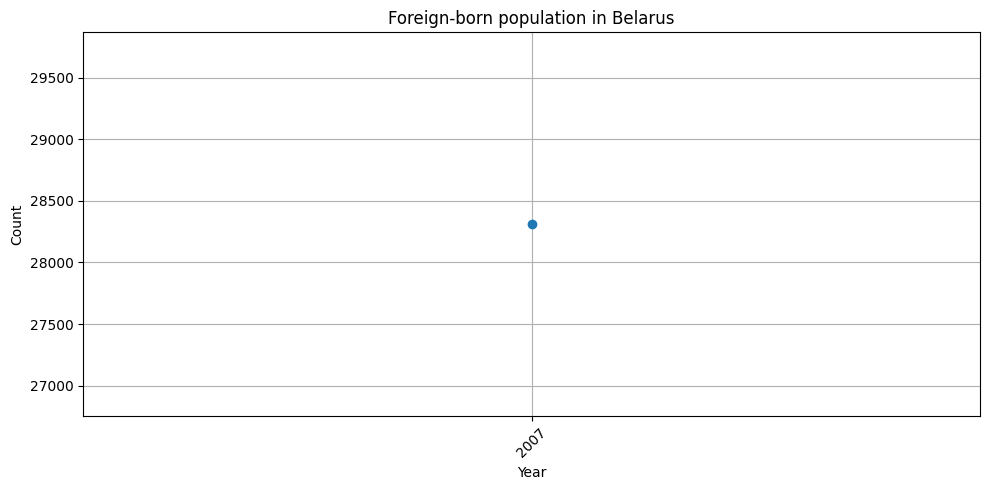

C:\Users\adami\AppData\Local\Temp\ipykernel_22272\1939552420.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(r'[^\d.]', '', regex=True)


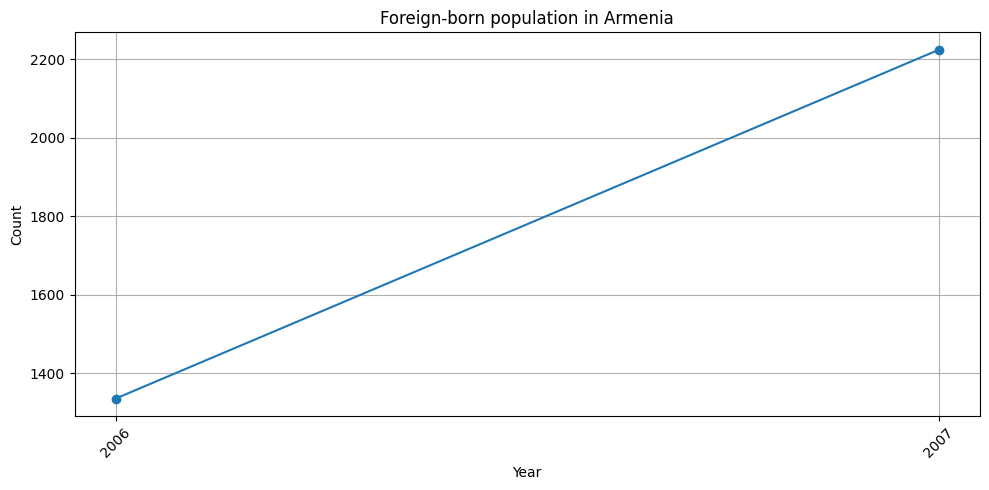

C:\Users\adami\AppData\Local\Temp\ipykernel_22272\1939552420.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(r'[^\d.]', '', regex=True)


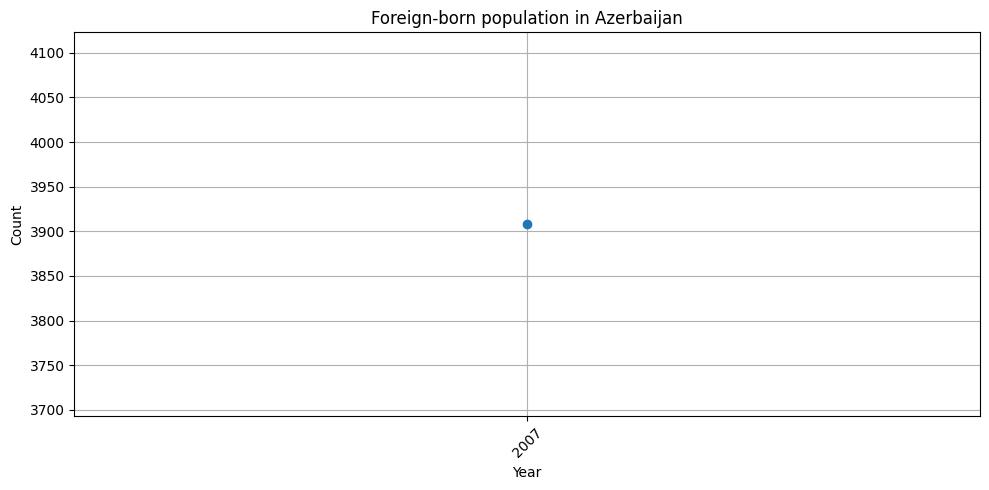

C:\Users\adami\AppData\Local\Temp\ipykernel_22272\1939552420.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(r'[^\d.]', '', regex=True)


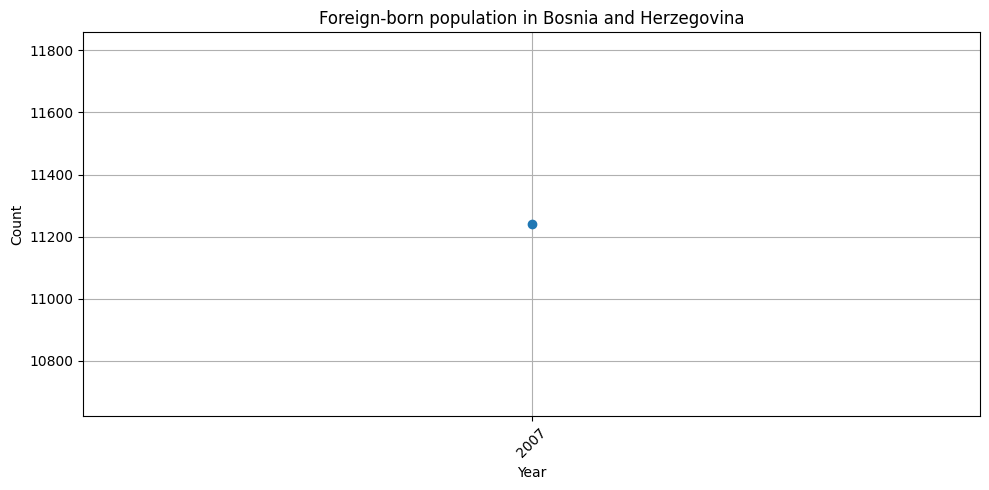

C:\Users\adami\AppData\Local\Temp\ipykernel_22272\1939552420.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(r'[^\d.]', '', regex=True)


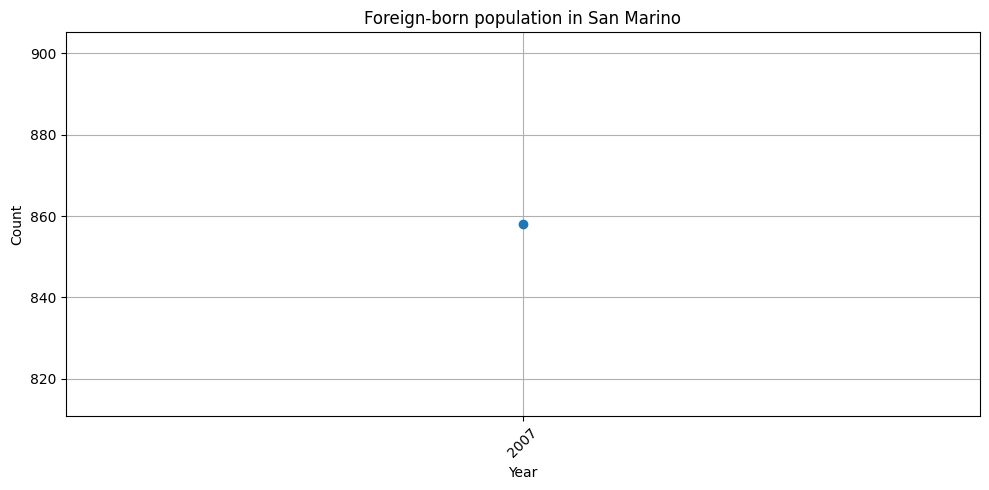

C:\Users\adami\AppData\Local\Temp\ipykernel_22272\1939552420.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(r'[^\d.]', '', regex=True)


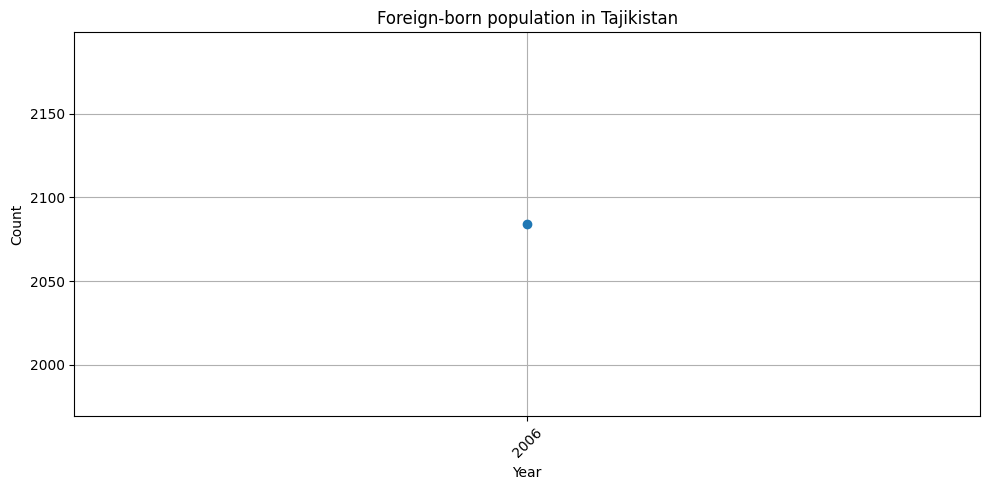

C:\Users\adami\AppData\Local\Temp\ipykernel_22272\1939552420.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(r'[^\d.]', '', regex=True)


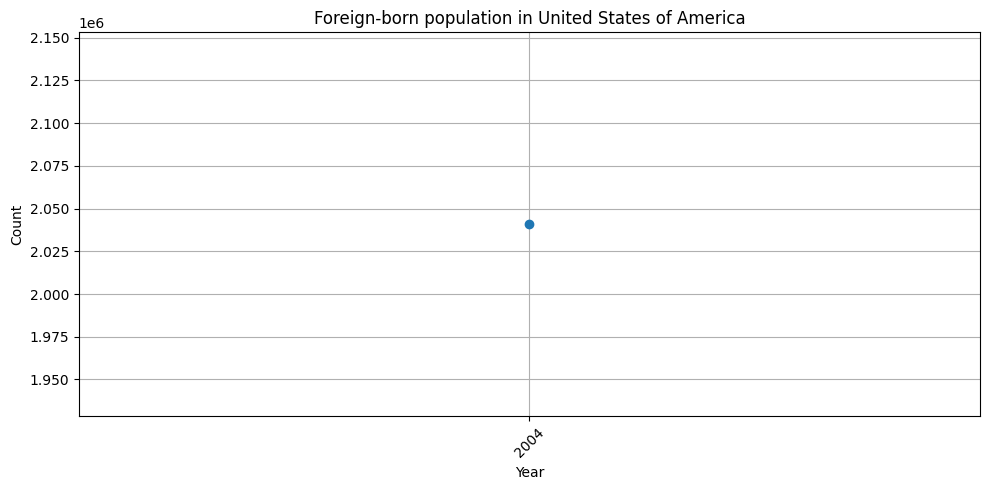

C:\Users\adami\AppData\Local\Temp\ipykernel_22272\1939552420.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(r'[^\d.]', '', regex=True)


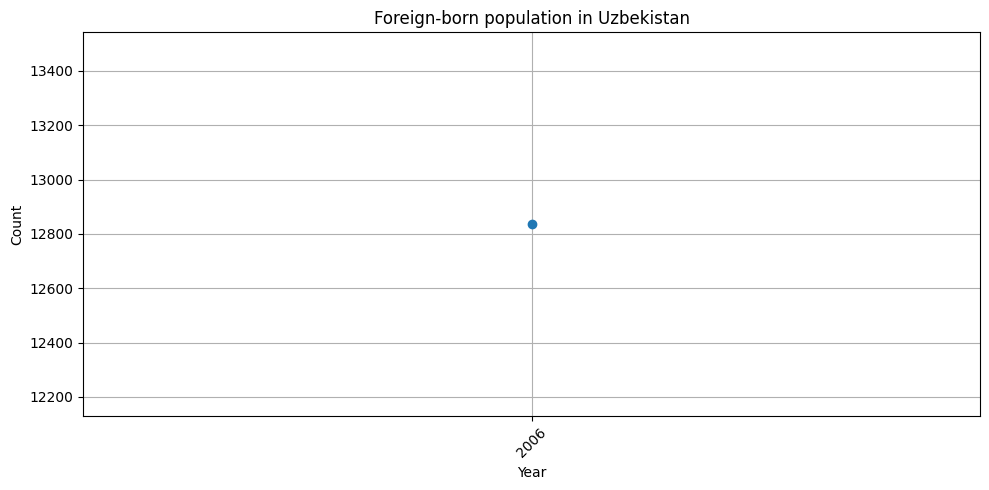

C:\Users\adami\AppData\Local\Temp\ipykernel_22272\1939552420.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(r'[^\d.]', '', regex=True)


In [37]:
immigration_count=pd.read_csv("../Data/immigration/immigration_citizenship.csv")
#immigration_count.drop(columns=[str(i) for i in range(1998,2005)])
states_in_second_table=[i for i in immigration_count["Country"].unique() if i in states]

#for i in states_in_second_table:
 #   for x in range(2004,2024):
  #      value = immigration_count.groupby(["birth_country",'Country',"age",str(x)])
   #     print(value)

immigration_count.columns = immigration_count.columns.astype(str)

year_cols = [str(y) for y in range(2004, 2024)]

countries = immigration_count['Country'].unique()

for country in countries:
    country_df = immigration_count[immigration_count['Country'] == country]
    
    values = (
        country_df[year_cols]
        .replace(r'[^\d.]', '', regex=True) 
        .apply(pd.to_numeric, errors='coerce')  
        .sum()  
    )
    
    values = values[values > 0].dropna()

    if values.empty:
        continue

    plt.figure(figsize=(10, 5))
    plt.plot(values.index, values.values, marker='o')
    plt.title(f'Foreign-born population in {country}')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.close()


def draw_choropleth(data, column,range=None,save_name=None,title="",scale=""):
  if range is not None:
    fig = px.choropleth(
      data, locations=data.index, color=column,
      projection = "azimuthal equidistant",
      range_color=range
    )
  else:
      fig = px.choropleth(
      data, locations=data.index, color=column,
      projection = "azimuthal equidistant"
      )

  fig.update_geos(lonaxis_range= [-20, 40],lataxis_range= [30, 72])
  fig.update_layout(height=500, margin={"r":0,"t":50,"l":0,"b":30},
                    title={
        'text': title,
        'y':0.96,  # Position from top (0 to 1)
        'x':0.5,    # Center the title
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=18) })
  
  
  #I used Deepseek AI to write this code
  if save_name:
    try:
      fig.write_image(f"../Images/Maps/{save_name}.png", scale=4)
      print(f"Successfully saved to {save_name}.png")
    except Exception as e:
      print(f"Could not save PNG: {str(e)}")
      print("Install kaleido with: pip install -U kaleido")
  else:
    fig.show()
